In [5]:
using Pkg;
Pkg.activate("..")
using EnKF

  Activating project at `d:\GitHub\jl-pkgs\EnKF.jl`


In [6]:
using Distributions
using LinearAlgebra
using Plots
using ProgressMeter
using OrdinaryDiffEq

We are interested in simulating the Lorenz attractor
            $$ ẋ = \sigma(y - x)\\
       ẏ = x(\rho-z) - y\\
       ż = xy - \beta z$$

Define parameters of the Lorenz attractor

In [7]:
function lorenz(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

# u0 = [1.508870; -1.531271; 25.46091]
u0 = [1.0; 0.0; 0.0]
tspan = (0.0,40.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob)

Δt = 1e-3
T = tspan[1]:Δt:tspan[end]
integrator = init(prob, RK4(), adaptive =false, dt = Δt, save_everystep=false)

t: 0.0
u: 3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [8]:
states = [deepcopy(u0)]

1-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]

In [9]:
for t in T[1:end-1]
  step!(integrator)
  push!(states, deepcopy(integrator.u))
end

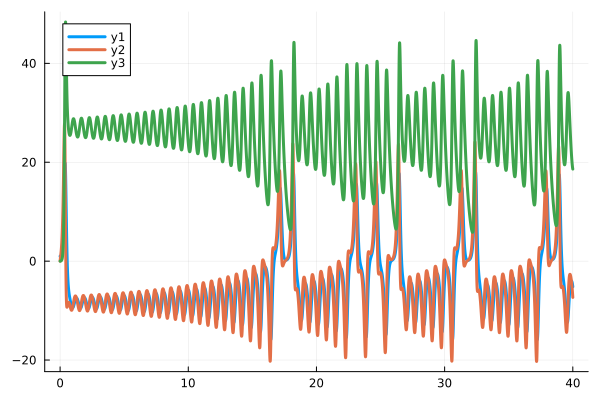

In [11]:
plot(T, hcat(states...)[1,:], linewidth  = 3)
plot!(T, hcat(states...)[2,:], linewidth = 3)
plot!(T, hcat(states...)[3,:], linewidth = 3)

Define propagation function fprop

In [ ]:
function (::PropagationFunction)(t::Float64, ENS::EnsembleState{N,TS}) where {N,TS}
  for (i, s) in enumerate(ENS.S)
    set_t!(integrator, deepcopy(t))
    set_u!(integrator, deepcopy(s))
    step!(integrator)
    ENS.S[i] = deepcopy(integrator.u)
  end
  # print(ENS)
  return ENS
end

fprop = PropagationFunction()

EnsembleState{500,Array{Float64,1}}(Array{Float64,1}[[2.04882, -0.776536, 24.6479], [3.39619, -0.0721303, 25.3587], [0.392385, -0.709611, 25.8043], [2.33471, -1.98491, 23.6472], [2.68638, -1.99276, 24.2605], [-0.741505, -3.26789, 23.2682], [3.17378, -0.665472, 28.7338], [-0.723975, -2.34027, 26.2151], [3.03234, 1.3023, 25.4209], [0.176109, -1.14819, 24.9834], [-0.638995, 0.578, 27.1115], [0.811515, -0.0790068, 21.5354], [1.1304, 2.21233, 28.4327], [5.72593, -4.01677, 25.0855], [-0.481236, 1.52708, 29.259], [-0.948444, -0.427918, 25.919], [2.30991, 1.49586, 25.336], [-1.28636, -3.56302, 27.7047], [-0.354408, 2.29516, 23.0535], [0.489778, 0.884471, 27.1685], [1.1335, 0.182693, 24.2775], [4.64368, -0.749498, 25.3815], [-0.869492, -3.21213, 25.1803], [0.645449, -0.147901, 25.435], [0.991328, -4.98104, 25.0572], [4.70858, -2.45597, 24.6897], [1.69715, -1.22805, 24.6507], [-1.12836, -0.899218, 26.3162], [4.96117, -1.2199, 27.0762], [0.968749, -3.58996, 24.1444], [-1.71049, -2.52813, 28.4104]

, -2.05628, 26.2076], [4.6675, 2.1597, 28.3661], [2.48152, -2.87662, 23.2387], [2.11376, -3.07184, 22.7424], [-1.87556, -3.54994, 25.381], [-0.681548, -1.63625, 28.3767], [0.585522, -1.15095, 24.598], [2.66668, -0.487881, 28.4215], [1.0079, -1.13342, 24.1813], [2.63864, -2.78655, 27.4985], [1.20121, -3.87557, 26.1798], [0.733794, -1.04047, 23.9534], [-1.6753, 1.25904, 28.1943], [1.43247, -1.56904, 25.3364], [-1.0455, 2.32906, 23.446], [5.58573, -2.20679, 23.7605], [0.375089, -0.0443333, 23.6849], [-0.256831, -6.03084, 24.3184], [0.606639, 0.312304, 23.7795], [3.87374, -3.57804, 24.7563], [-0.74387, -1.40737, 23.6763], [0.111156, -1.11944, 24.6165], [1.4197, -4.73227, 25.7065], [1.27766, -2.32169, 27.6232], [2.42934, -5.13009, 25.2684], [2.48173, -1.65923, 22.3049], [-3.52645, -0.593247, 24.9372], [-0.668549, -3.02506, 27.4057], [-0.0483126, -2.90921, 26.6909], [4.62717, 0.316265, 23.6301], [-0.663095, 0.0138778, 25.2059], [3.25514, -2.80112, 25.054], [1.90586, 1.74904, 24.0671], [-1.49

EnsembleState{500,Array{Float64,1}}(Array{Float64,1}[[2.04882, -0.776536, 24.6479], [3.39619, -0.0721303, 25.3587], [0.392385, -0.709611, 25.8043], [2.33471, -1.98491, 23.6472], [2.68638, -1.99276, 24.2605], [-0.741505, -3.26789, 23.2682], [3.17378, -0.665472, 28.7338], [-0.723975, -2.34027, 26.2151], [3.03234, 1.3023, 25.4209], [0.176109, -1.14819, 24.9834]  …  [1.56565, -3.43457, 25.3773], [4.59268, -0.308315, 28.0714], [2.31896, -3.27159, 25.3095], [1.875, -2.22179, 21.7321], [1.44613, -4.27663, 22.5868], [-0.14396, -2.92632, 24.2913], [1.32965, -1.08787, 23.1868], [-0.203629, -3.80968, 25.6834], [1.20971, -1.18377, 23.313], [-0.462536, -2.41542, 26.6113]])

Define measurement function m

In [16]:
function (::MeasurementFunction)(t::Float64, s::TS) where TS
    return s
end

In [17]:
function (::MeasurementFunction)(t::Float64)
    return I
end

In [18]:
m = MeasurementFunction()

MeasurementFunction()

Define  real measurement function z

In [19]:
Z = AdditiveInflation(MvNormal(zeros(3), 1e-3*I))

AdditiveInflation{3}(IsoNormal(
dim: 3
μ: [0.0, 0.0, 0.0]
Σ: [0.001 0.0 0.0; 0.0 0.001 0.0; 0.0 0.0 0.001]
)
)

In [20]:
function (::RealMeasurementFunction)(t::Float64, ENS::EnsembleState{N, TZ}) where {N, TZ}
    return Z(ENS)
end

In [21]:
z = RealMeasurementFunction()

RealMeasurementFunction()

Define covariance inflation

In [22]:
A = MultiAdditiveInflation(3, 1.01, MvNormal(zeros(3), 1.0*I))

MultiAdditiveInflation{3}(1.01, IsoNormal(
dim: 3
μ: [0.0, 0.0, 0.0]
Σ: [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]
)
)

Define noise covariance

In [23]:
ϵ = AdditiveInflation(MvNormal(zeros(3), 1e-3*I))

AdditiveInflation{3}(IsoNormal(
dim: 3
μ: [0.0, 0.0, 0.0]
Σ: [0.001 0.0 0.0; 0.0 0.001 0.0; 0.0 0.0 0.001]
)
)

In [24]:
N = 50
NZ = 3
isinflated = true
isfiltered = false
isaugmented = false

false

In [25]:
ens = initialize(N, MvNormal(u0, 2.0*I))
estimation_state = [deepcopy(ens.S)]

tmp = deepcopy(u0)
true_state = [deepcopy(u0)]

1-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]

In [ ]:
ens

EnsembleState{50, Vector{Float64}}([[1.202431505781093, 0.6359260834288498, 0.13698256627841657], [4.6225677787000015, -2.4913752936860734, -0.39291841773880776], [1.484764855478197, -1.346107240814, 1.0115071052167428], [0.7441142915630661, -0.43778228707642697, 2.6779248361687924], [1.3520696898823334, 0.5969787102166315, 1.107299483060637], [2.314906611363095, 1.766259733362055, -3.465580118086962], [-0.6847235955218203, -1.9960871467547423, -0.006962098795866944], [1.4319462273583288, 0.9943156030770285, 1.3412769288780746], [1.19376894357478, -0.5123883629113123, -0.6796218457505162], [1.9250559837501215, 0.7540228559324247, 0.9081700802461583]  …  [0.08549899613210299, 0.7786816902894249, -3.2425930953449114], [3.6431419366980426, 2.4809981499809703, 0.02059073892676433], [2.7391051371649064, -0.6325520541325481, -0.5704756112063454], [3.3317994807319167, -1.5148726070065783, 3.133953483645349], [0.22778258053484768, 0.583650233398624, -0.11388227682132436], [1.389354574373419, -

In [27]:
fprop(0.0, ens)

EnsembleState{50, Vector{Float64}}([[1.1969581601244972, 0.6686997386725766, 0.13739929075950075], [4.552445859877941, -2.3586792013744944, -0.4029814392256699], [1.456802287847862, -1.3050856144488745, 1.0068663768197272], [0.7324497880380446, -0.41865716536323044, 2.670477506181666], [1.344734246341813, 0.6326265295727497, 1.105178506442709], [2.309801223842477, 1.8372000929559502, -3.4521902543424927], [-0.697858080696205, -2.0134427843730993, -0.005559528143475992], [1.4277767634868437, 1.0314216124305484, 1.3391512681192073], [1.1769646959288365, -0.47789933507484195, -0.6783980454259624], [1.9136595486757106, 0.8052415950309958, 0.9072459071450995], [0.05019701326107618, -1.7151487751259855, 1.2813663822854815], [-0.6066431431826517, -3.678147918299919, 1.07683066802334], [0.5697183864663667, 0.9914349497508819, 0.438383553620749], [2.6356442291752193, -0.39444067280291073, -3.442507492876554], [0.8422578250000807, 1.066817265748086, 2.382361748906595], [3.354282044752484, 1.1989

EnsembleState{50, Vector{Float64}}([[1.1969581601244972, 0.6686997386725766, 0.13739929075950075], [4.552445859877941, -2.3586792013744944, -0.4029814392256699], [1.456802287847862, -1.3050856144488745, 1.0068663768197272], [0.7324497880380446, -0.41865716536323044, 2.670477506181666], [1.344734246341813, 0.6326265295727497, 1.105178506442709], [2.309801223842477, 1.8372000929559502, -3.4521902543424927], [-0.697858080696205, -2.0134427843730993, -0.005559528143475992], [1.4277767634868437, 1.0314216124305484, 1.3391512681192073], [1.1769646959288365, -0.47789933507484195, -0.6783980454259624], [1.9136595486757106, 0.8052415950309958, 0.9072459071450995]  …  [0.0924060652258227, 0.7806808699589259, -3.2338884331786444], [3.6320732716555284, 2.5802265227551886, 0.02972889920102153], [2.705948008357368, -0.5541773708363813, -0.5705695458023007], [3.283992646522599, -1.4311262348726308, 3.1207416128625844], [0.23135268380798601, 0.5895175905843315, -0.11344451443119215], [1.36870472025908

In [28]:
g = FilteringFunction()

FilteringFunction()

In [30]:
enkf = ENKF(N, NZ, fprop, A, g, m, z, ϵ; isinflated, isfiltered, isaugmented)

ENKF{50, 3}(PropagationFunction(), MultiAdditiveInflation{3}(1.01, IsoNormal(
dim: 3
μ: [0.0, 0.0, 0.0]
Σ: [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]
)
), FilteringFunction(), MeasurementFunction(), RealMeasurementFunction(), AdditiveInflation{3}(IsoNormal(
dim: 3
μ: [0.0, 0.0, 0.0]
Σ: [0.001 0.0 0.0; 0.0 0.001 0.0; 0.0 0.0 0.001]
)
), true, true, false, false)

### Ensemble Kalman filter estimation

In [ ]:
Δt = 1e-2
T = 0.0:Δt:40.0

@showprogress for (n, t) in enumerate(T)
  #     push!(true_state, deepcopy(tmp))
  global ens
  enkf.f(t, ens)
  #     t, ens = enkf(t, Δt, ens)
  push!(estimation_state, deepcopy(ens.S))
end

EnsembleState{50, Vector{Float64}}([[1.191864470585911, 0.7012929923740299, 0.1378504481996386], [4.484331749646141, -2.228033814462188, -0.4122561605530447], [1.4295222242923238, -1.264843488062002, 1.0023331286146897], [0.7210901194179922, -0.3998371570218144, 2.6630687018776253], [1.3378253662719088, 0.668050099041959, 1.1031064040768699], [2.3054512357733663, 1.9078899018624187, -3.4386813619693894], [-0.7110363101593309, -2.031148344386978, -0.004122019882967421], [1.4240172920436185, 1.0683878990766362, 1.3370799966371507], [1.1606682693332424, -0.4439206196376605, -0.6771293628496121], [1.902884388301601, 0.8561106503041015, 0.9064128374267959], [0.032645973588809246, -1.712328736412554, 1.2778830993934174], [-0.637269541015568, -3.691208925465011, 1.0762516730986493], [0.5739880169480932, 1.0061972714578251, 0.4377864978520323], [2.6059075821515756, -0.311697608478927, -3.4342636791190353], [0.844594508096372, 1.0873486808320183, 2.376924466125741], [3.333303849053841, 1.292727

Progress:   0%|█                                        |  ETA: 4:40:40

EnsembleState{50, Vector{Float64}}([[1.1827941418003725, 0.7659806918839714, 0.13885461297070642], [4.353967427053313, -1.972681032767718, -0.42857337186403327], [1.3769521196862728, -1.1866237179738164, 0.9935714458029277], [0.6992613019284216, -0.36308162679779704, 2.648363220426657], [1.32526180129457, 0.7382703541750465, 1.0991063361906936], [2.2989782259543556, 2.048612225995932, -3.411306608235627], [-0.7375361833673822, -2.067612732596149, -0.0011393255210752555], [1.4177068267793764, 1.1419447539754757, 1.333099931027343], [1.1295589020787888, -0.3774347779331068, -0.6744654267266305], [1.883159845338026, 0.9568668548590947, 0.9050142325143851], [-0.0018616713207147944, -1.7080893906090893, 1.2710336105494542], [-0.698019834058387, -3.719752974710732, 1.0754622066450592], [0.5828420587481987, 1.0360386493508666, 0.4366359219831437], [2.54975543988403, -0.14923930264978064, -3.417180694274666], [0.8498103548267046, 1.128554754651354, 2.366153512874434], [3.2947456728196927, 1.47

Progress:   0%|█                                        |  ETA: 0:56:15

-0.6716245821520612], [1.1170613577201849, -0.5695325500864743, 0.49713901864438975], [3.9008992973891994, 3.900569118085339, -1.1579752847391809], [0.23190167613428464, 0.27770745214367293, -0.5456463066682264], [-0.5958331751331492, -0.18321963727937923, 0.3865665690086737], [3.411719073371061, 3.5457438023952395, -2.089757395098006], [-0.7554859698542157, -0.35570998475721044, -2.2713971969146685], [2.423972076170297, 1.8207717367437646, -1.50483143808479], [1.7679288785061533, -1.1634507042546518, -0.2818754839687162], [0.8977187368511769, 1.7116648513605002, -1.730769868246157], [1.7318230675222441, 1.4338594492363013, -1.5616849368958414], [-0.27811764090644037, -0.1453213222663685, 1.5138386921680271], [1.3573369780810713, 0.2057978801019013, 1.0872334843059983], [1.905925494451829, 0.24807853533131274, -0.6100573546540206], [2.0226332184432567, -0.6488036828683038, -0.7813514097265334], [0.19164896874746412, 0.8352652594928048, -3.105388885157272], [3.589854284890876, 4.0333628

Progress:   0%|█                                        |  ETA: 0:53:16

, -0.23315824416715814], [1.3805501858460516, 0.5569704183688771, 0.8054399833122172], [-0.11328735673151104, -1.366478960795182, 1.5664173146538694]])EnsembleState{50, Vector{Float64}}([[1.1579583932981918, 1.206474038903893, 0.14958422886163977], [3.637533642923694, -0.3752540777010182, -0.4765121267923786], [1.0750103635681272, -0.7129049326172087, 0.9413192156432657], [0.5762663125948722, -0.1343204750967606, 2.549156917471106], [1.2805732470874787, 1.2132176717778427, 1.0762530531986425], [2.331475868582992, 3.023161735701906, -3.2058491301325356], [-0.9302694619167924, -2.36296948475786, 0.024278002715459622], [1.4156752044993095, 1.6493164650837162, 1.311346066467053], [0.9614951302463849, 0.0416521453962737, -0.6521192984504277], [1.8079184403168167, 1.635452100104712, 0.9046363255229352], [-0.22516049347436823, -1.7275494451906857, 1.2272024550123743], [-1.1103529727067725, -4.00718235128688, 1.0841912767227755], [0.6566431653752378, 1.258518230058366, 0.4303890861107642], [2.

Progress:   0%|█                                        |  ETA: 0:49:00

, [0.21090770574975962, 0.8515110008184037, -3.080137597505872], [3.6072277961622405, 4.320623765691119, 0.2469062324929747], [2.279688330594836, 0.7125324284784272, -0.5400900604148012], [2.624178694890453, -0.1031066370607564, 2.9354141307951904], [0.3002916069546849, 0.7119441303840651, -0.10509178343635657], [1.090939546607675, -0.015573554979357852, -1.3889186523035129], [2.9898051045763028, 2.943890132974444, 1.2302880351265828], [1.652495110689396, 2.8912724213018515, -0.22260004811503636], [1.3649736820112843, 0.6304417708886673, 0.8027813738055571], [-0.13813891821737295, -1.370391290742436, 1.5584285866936207]])EnsembleState{50, Vector{Float64}}([[1.1595356201646652, 1.268534214685086, 0.15164868500851936], [3.5601242552967163, -0.16977368102261833, -0.4759325625097212], [1.0401926605823475, -0.65430505807003, 0.9348703946927532], [0.5624872977059706, -0.10509481699513558, 2.5354616864066943], [1.2798997971938246, 1.279659565055882, 1.07371111717493], [2.346559146817879, 3.16

Progress:   0%|█                                        |  ETA: 0:47:01

], [-0.27347655250074104, -0.17389893437976614, 1.497952003700662], [1.3150172107178317, 0.3484892234964153, 1.0771715358301635], [1.8451514182995175, 0.4611569148630774, -0.6009377508758719], [1.9224465968486426, -0.4197224113935492, -0.777249637187371], [0.21731055622759443, 0.857310260569949, -3.0717521441007682], [3.6148036576922515, 4.416442891367164, 0.26200232682658636], [2.264414696372081, 0.7766269483064266, -0.5369622740739807], [2.59736884150424, -0.037589845662278985, 2.9274134221721213], [0.3044263080461114, 0.7197259701312966, -0.10459576223826272], [1.0800888143515903, 0.01632507847687757, -1.385219384957869], [2.9897322553584487, 3.0209328796381336, 1.2359163626521081], [1.6650396529662796, 2.9351687301960268, -0.21718136838181787], [1.3578464410566489, 0.6668195619045822, 0.801525342022635], [-0.15041194493957166, -1.3728350796978854, 1.5544759534073058]])EnsembleState{50, Vector{Float64}}([[1.1607747719448576, 1.2995572619458178, 0.1527325145713376], [3.52351527857060

Progress:   1%|█                                        |  ETA: 0:43:06

-0.20605353872244], [1.3448807975732011, 0.7389192672568912, 0.7991564404661613], [-0.17467354098722224, -1.3786837586717267, 1.5466536365333583]])EnsembleState{50, Vector{Float64}}([[1.1641393687194586, 1.3616305246367844, 0.15500522308515893], [3.4543626292448124, 0.12979729168226745, -0.47234678974390654], [0.9913749425503222, -0.5700055297336026, 0.9255641305957082], [0.5433922208033775, -0.0625975597584372, 2.5151204812179353], [1.281370006127694, 1.379106622008071, 1.0702420576678833], [2.373810284829265, 3.3735853815976067, -3.126027486344574], [-1.0031298884981041, -2.4860151889621425, 0.035596460579573504], [1.4315203307030335, 1.8305139787533373, 1.3062760754961753], [0.9199581640242567, 0.17574896515097987, -0.6429736271987786], [1.8053123874806283, 1.8712891680401367, 0.9083823648165545], [-0.299042818677736, -1.753971847578478, 1.2132167004133458], [-1.2549689459209339, -4.145944841974743, 1.0937811056829116], [0.688099359610229, 1.3446679902416838, 0.4290344849782487], [2

Progress:   1%|█                                        |  ETA: 0:39:50

0.9225526781149216], [0.5374315732499624, -0.04876816289171248, 2.508392379460355], [1.282507584924174, 1.412233222264572, 1.0691786366358844], [2.384109952550967, 3.444203000675563, -3.109603805087586], [-1.0180128922413851, -2.511774874341102, 0.038023601562457036], [1.4356718116284395, 1.8669331654885792, 1.3054440724724963], [0.9126831999082081, 0.20180466102103997, -0.6410885633056993], [1.8062032269668464, 1.9183133348936596, 0.909380186581273], [-0.31355142031378735, -1.7604199947272083, 1.210523288666527], [-1.2838834856911963, -4.175937909267226, 1.096143238146632], [0.6947204411637689, 1.3623771384530858, 0.42882650182511806], [2.2008328129962247, 1.307929563304629, -3.2128106969379275], [0.9400120879426127, 1.5585749976893213, 2.266583853302502], [3.13199369991129, 3.234277177254449, -0.24800081702134105], [0.3927870475139923, -1.215702354918633, 0.7004847194076121], [0.33845827004077766, -0.7431364702856664, -0.10577143624673332], [-0.542334213513205, 1.6980646026111201, -0

Progress:   1%|█                                        |  ETA: 0:37:06

, -1.1927148631872755, 0.6958534932518925], [0.31724088576506054, -0.7232452392033132, -0.10568817968220816], [-0.4982991020693328, 1.6654913156371598, -0.07714726585590277], [2.374384412199325, 0.15174616371250066, -1.5172630261250564], [1.5697727800457102, 2.3415315234952265, -1.3596634308965854], [3.18327052305534, 1.6661500319327496, 3.003664673403665], [0.6330988895774842, 2.10297690956572, -0.40761323337337624], [0.4968200249758199, -1.1072920184736534, 0.5871268645891081], [1.7695279853171986, 1.9362303812067574, 1.3444776790701927], [1.2771578272536233, 0.6104500715015525, -0.648426209222772], [0.9709499217784998, -0.27910130969633484, 0.4797108508540193], [3.9538298654694213, 4.994851574352269, -0.955357194014613], [0.23934567512157093, 0.3417194775744249, -0.5305688663776844], [-0.5642500935321176, -0.3403540813724612, 0.37789130873333254], [3.4723373034179303, 4.5354909237800225, -1.897709847964658], [-0.7281245632523229, -0.5747499656741225, -2.2082260129312736], [2.3999387

Progress:   1%|█                                        |  ETA: 0:35:56

0.5850262438816085], [1.7714121111307761, 1.9814634917218932, 1.344360595458928], [1.2707028891675187, 0.646315155669223, -0.6458999352636047], [0.9586456452895408, -0.25228428964701394, 0.47817734457822214], [3.964734016352397, 5.104397561857683, -0.9328469599695646], [0.24039667619102803, 0.3482178628648561, -0.5290732640817043], [-0.5620981392929718, -0.3555620027826188, 0.37708063837123645], [3.4834108589458257, 4.634847637137689, -1.8767308349716094], [-0.7267050900521042, -0.5961355616801219, -2.201919968490441], [2.4013526283508444, 2.57600118567612, -1.403933230352337], [1.4906670168917324, -0.6488620528827326, -0.2896261496149015], [0.9975612873318769, 2.00026165426404, -1.6616935322382653], [1.7295854016285261, 1.9755493920394605, -1.4846142762421763], [-0.2684217234610715, -0.22274251588409744, 1.4706219970083148], [1.257913279777141, 0.5874000903060494, 1.0614243797290257], [1.7638716284569258, 0.8173198710556436, -0.5818264865723998], [1.7770563287738015, -0.04617219661973

Progress:   1%|█                                        |  ETA: 0:35:17

, [3.0160869170313536, 3.63581914164399, 1.2888766793746398], [1.776687697479704, 3.2980168411710933, -0.17017124864589317], [1.315852367198104, 0.95079807614008, 0.7931587166958808], [-0.24547245843550933, -1.40373644745423, 1.5238461147828573]])EnsembleState{50, Vector{Float64}}([[1.1811321473666665, 1.5486444360863691, 0.1626966668181732], [3.277733904204309, 0.7015428880964933, -0.45650929909017746], [0.9051316165050824, -0.4131707412539864, 0.9081036428940595], [0.510501031947928, 0.018084234659612196, 2.4751294795964145], [1.2929098805167363, 1.5780812279911585, 1.0645771289326584], [2.4445560855200577, 3.8009373280916012, -3.024991298852277], [-1.0941361214889105, -2.6464648126595542, 0.05104696973925268], [1.4612054480106602, 2.0503928196343817, 1.3022403183724514], [0.8811570540084828, 0.3288038504527009, -0.6314155814046982], [1.8174501001852985, 2.15339861496949, 0.91565019724991], [-0.38501027293132106, -1.798342792179889, 1.1975787679624166], [-1.42881691853651, -4.3370627

Progress:   1%|█                                        |  ETA: 0:34:18

 2.152422770394586, -0.4001998019607648], [0.4500475068339674, -1.065113779046206, 0.5809128454216997], [1.7764703582365373, 2.071973617757031, 1.3443808022437331], [1.259046713073377, 0.717403870517792, -0.6407440428890555], [0.9351921281504767, -0.1997148086634647, 0.47520710675340483], [3.98948035520857, 5.323905399653258, -0.8865229402340156], [0.24266134362678396, 0.3612878218343278, -0.5260881495968778], [-0.5583089413184139, -0.38576730741560683, 0.37548906264315585], [3.508188832672567, 4.834097938353142, -1.8337364807391203], [-0.7245430210368105, -0.6387175018310601, -2.1893140547418746], [2.406162128787051, 2.712011937280907, -1.3837889625801385], [1.4491437364926512, -0.564494418689239, -0.28986394140677857], [1.0179677331340264, 2.0559730740644557, -1.6487780519138715], [1.7354299558176016, 2.0736300724774797, -1.4697212422931014], [-0.2676540401626395, -0.23650579326873286, 1.462922319463655], [1.2452950599263328, 0.6535899116372593, 1.057327544325351], [1.746109810719530

Progress:   1%|█                                        |  ETA: 0:32:25

, -1.1427220004897274, 0.6847618168607289], [0.2676202205014995, -0.6787039205978076, -0.1053049017966364], [-0.3945692383944912, 1.594772932397155, -0.07973334061203866], [2.2744383756308912, 0.492774141503766, -1.4934434305269932], [1.6128280656303995, 2.5626164104129194, -1.3222802717918718], [3.118770919814791, 2.0505317269966437, 2.992956941315513], [0.7068205591398854, 2.187387490223108, -0.3950757163923928], [0.4203060013784843, -1.0391488593827, 0.5769098278942963], [1.783221841722027, 2.1626168554010836, 1.3447463284620678], [1.2490211375825133, 0.7877172904121584, -0.6354534842177149], [0.9132304363474708, -0.1484934442193411, 0.47235855537520005], [4.018090098440338, 5.544138283203727, -0.8384119649546705], [0.24514101973420543, 0.37446543586143194, -0.5231108501900833], [-0.5551903428810951, -0.4157234728077675, 0.3739368024006262], [3.5364299773689245, 5.0342241845861695, -1.789317529242204], [-0.7232647979412185, -0.6810924768731866, -2.1767159790450927], [2.4135692311326

Progress:   1%|█                                        |  ETA: 0:31:42

, 0.7900589005087058], [-0.2913226396200096, -1.4265183453849315, 1.5091899361893386]])EnsembleState{50, Vector{Float64}}([[1.1980240107158715, 1.674602686416988, 0.16859678124179225], [3.183943065178741, 1.0654849957380192, -0.4403080679683625], [0.8553697202886364, -0.31635672797325265, 0.8971923253343554], [0.49220653330033537, 0.06909970565609301, 2.448955435711242], [1.3067218155711928, 1.7115113860030222, 1.0617865471492818], [2.503461915007882, 4.091732568140852, -2.954058223680007], [-1.1572518436122128, -2.7614538187291973, 0.06261514637034639], [1.487239255895848, 2.199288746866478, 1.3008846604408664], [0.8614460911352924, 0.4270188569458451, -0.6234063590467389], [1.8343443790400817, 2.3421355121035705, 0.9222613546975169], [-0.4411395283041373, -1.8353780555756551, 1.187859283187888], [-1.5456200762964882, -4.479346412428281, 1.1246072673362622], [0.7593847274387675, 1.529598385821546, 0.4280004479933106], [2.150094367264821, 1.9022010436203345, -3.105604425833832], [1.002

Progress:   1%|█                                        |  ETA: 0:30:58

, [1.3734061376684081, -0.40295349758200627, -0.2895019370755759], [1.0609181891973296, 2.1707109879909288, -1.6225456471988986], [1.752570027090492, 2.270346287239773, -1.4390595621881022], [-0.26697345951133156, -0.2638781151640358, 1.4476667815912905], [1.2246721235137727, 0.7837743468706933, 1.049639991772879], [1.717393919638034, 1.1096487201892473, -0.5626131930803833], [1.6797132366845995, 0.2511085366923351, -0.7526336304959649], [0.3007759395023839, 0.9500012447223531, -2.9640965059189974], [3.7906310549781623, 5.676532824512966, 0.4913704304769532], [2.1332258371850763, 1.5726124637737176, -0.48572802980046975], [2.3266574580139383, 0.7577964460758486, 2.839032938737757], [0.3617936455939606, 0.8311425473842861, -0.09773436404502028], [0.9749987715243633, 0.4037168692282696, -1.3352578562091673], [3.0557873911682645, 4.021649151463963, 1.3295217154412207], [1.8567098907738813, 3.536576019098263, -0.13708914404919584], [1.3023082370451344, 1.1235979597197332, 0.789394931186779

Progress:   1%|█                                        |  ETA: 0:30:20

, -1.1175686894386996, 0.6784088904740627], [0.2400053905690322, -0.6553139052710253, -0.10497139013095885], [-0.33631478025222933, 1.5592777006195637, -0.08081880105445907], [2.2247228498184195, 0.6899351043271298, -1.477568420147223], [1.6429016069262912, 2.69784441278761, -1.2989518128322513], [3.0905686993615022, 2.276927016416237, 2.9891791106087107], [0.7513925760889608, 2.2428410965915444, -0.3871018286313559], [0.3777142727087175, -1.0032725552047665, 0.5710961088370164], [1.7964588587881418, 2.299022979450138, 1.345960579325649], [1.2369387314766211, 0.8919372332747516, -0.6272713427974816], [0.8829646098178796, -0.07400897935955934, 0.4682964866053234], [4.068118410235694, 5.876281976571945, -0.7627538851866427], [0.24925936081174258, 0.39445982326334295, -0.5186587079990875], [-0.5517310822564909, -0.4602711344576658, 0.37168149183490024], [3.5851784477782767, 5.336465448921182, -1.7198949792756024], [-0.7229589851093805, -0.7443827537711655, -2.15783192797042], [2.429441674

Progress:   1%|█                                        |  ETA: 0:29:41

[2.2967342229592957, 0.8725091054880912, 2.827690371346946], [0.37127445783133567, 0.8500576826092928, -0.0965999382787121], [0.9642442719550042, 0.4597272930518727, -1.3273204818814557], [3.0764541573368613, 4.176933811961167, 1.3475195874358548], [1.8909466313393415, 3.634820654294534, -0.12295820748231266], [1.2994502199106335, 1.192072784664956, 0.7882002525498161], [-0.3251661686821155, -1.4467138586091972, 1.498487992334724]])EnsembleState{50, Vector{Float64}}([[1.2135246297902649, 1.7700856874639792, 0.17345813293619808], [3.1252895986588283, 1.3309064959499841, -0.4255059348536939], [0.8217721348107543, -0.24734002344040373, 0.8893375817303707], [0.4802539779023658, 0.10611243040627549, 2.4295692431136797], [1.3201808827195693, 1.8123574333461971, 1.0602403303907746], [2.5536898486085917, 4.313685350191777, -2.89876994089232], [-1.2059992296629387, -2.85204373321194, 0.07202570527706086], [1.5099617280379791, 2.312538018551176, 1.300619781497644], [0.8496799389291635, 0.4990709

Progress:   1%|█                                        |  ETA: 0:28:22

[2.2696587285147136, 0.9856104537912966, 2.8168805087074458], [0.38094702242066497, 0.869471754671121, -0.09544111238662045], [0.9548045371549317, 0.515019017725462, -1.3193275203760246], [3.0997937453453903, 4.332966260822239, 1.3665604443965556], [1.9264676836979207, 3.7347743624426193, -0.1082756874890162], [1.2980020692714898, 1.2602967698580407, 0.7871840086811724], [-0.34752061817959434, -1.4616359607574818, 1.491492990496244]])EnsembleState{50, Vector{Float64}}([[1.2251826445816802, 1.8343330768298547, 0.17691864101274177], [3.091489014675475, 1.5047320586610982, -0.4144521163250667], [0.801045774514047, -0.20289607836322995, 0.8842428149208589], [0.47308598489172254, 0.1302567364640213, 2.4167584034640384], [1.3305985825905449, 1.8800723475771821, 1.0594814167076776], [2.590027738094037, 4.46373365963914, -2.8608378141199187], [-1.2392112466048768, -2.914556364619639, 0.07867396752592545], [1.5266112010259956, 2.3889057708505073, 1.300820441239583], [0.8432089669623114, 0.54646

Progress:   1%|█                                        |  ETA: 0:27:54

, [0.32442171145148174, -0.9608585304058228, 0.5636664659045149], [1.8197735868018172, 2.482169135807417, 1.3488746600955817], [1.226122745233129, 1.0290319689759586, -0.6159107498040827], [0.84733679216981, 0.021331965090595057, 0.46323765145816537], [4.147825376722071, 6.32349277124109, -0.6549784087070046], [0.2554865676735186, 0.4216062915137099, -0.5127461065000614], [-0.5493081953898493, -0.5191325021980528, 0.36881034559549575], [3.661875309107071, 5.74423287014116, -1.6217857678899192], [-0.7254601014639539, -0.8285299706144361, -2.1326717795505608], [2.459260282297963, 3.3260213411354074, -1.2857314919367229], [1.2914909377988577, -0.21311233453676587, -0.2877023567758077], [1.1187017185131805, 2.3207513235120194, -1.5889019278475283], [1.783907880851754, 2.518343298210351, -1.3989779733189465], [-0.26766066625486895, -0.297957091419892, 1.4288655204931355], [1.207102600305231, 0.943226029972044, 1.0409506610370896], [1.6936053147948928, 1.3468431457202719, -0.5447606822716173

Progress:   1%|█                                        |  ETA: 0:27:26

, [3.683107749606427, 5.84717406890813, -1.5962106824964402], [-0.7265904833420244, -0.8495652225628535, -2.126383881462268], [2.4682273002906934, 3.3947976478019988, -1.2740393886100714], [1.2767022428480608, -0.17659491190637802, -0.2871860269837949], [1.1308162317369366, 2.3516911896068633, -1.5820463364273567], [1.7914646955571867, 2.5683476948011226, -1.390711745836421], [-0.26799608232463906, -0.30477258623834086, 1.4251408937915655], [1.2046342911369476, 0.9747763022213796, 1.039333363121207], [1.6903889286463574, 1.3937661132436976, -0.5409944921612839], [1.6048408988085374, 0.5316898681585848, -0.7368604274503866], [0.3401272457269515, 1.003617496948546, -2.9151851970158074], [3.917987418620736, 6.274987010706799, 0.6206168121940814], [2.110951772875194, 1.9243093913828984, -0.4559441530867557], [2.2453440843953367, 1.097241198267942, 2.8065864662129125], [0.390817519601405, 0.8893946404150537, -0.0942565545807118], [0.9466400758102469, 0.5696695375521957, -1.3112813948322992]

Progress:   1%|█                                        |  ETA: 0:27:26

, -1.4861826131482807, 1.4812126350717785]])EnsembleState{50, Vector{Float64}}([[1.2446290538997995, 1.9317345425080663, 0.18245650124894672], [3.0484160946669876, 1.7613785046231096, -0.39617097805108936], [0.7723388371011364, -0.13839966754369556, 0.8767962178308074], [0.463483093583388, 0.16575792128256098, 2.397708556587196], [1.3483566917277077, 1.9825219036741806, 1.0587684017291543], [2.648787173497042, 4.692243040603878, -2.8022146110963395], [-1.2901562984680015, -3.011573498396521, 0.0892437754906733], [1.5538141973692456, 2.5049131702956866, 1.3017155221714636], [0.8354846997450555, 0.616741726409557, -0.6067459021956957], [1.8882252702904079, 2.7244702816705817, 0.9400882835238651], [-0.5517509010798203, -1.9268948673808302, 1.1701831760655974], [-1.7833500839980034, -4.79977173431482, 1.1619955414103054], [0.824816333178908, 1.6912979599973594, 0.4290587143138988], [2.1511781036253708, 2.418366603451113, -3.0033137398170724], [1.068883695670179, 1.9670003722267253, 2.19548

Progress:   1%|█                                        |  ETA: 0:27:03

EnsembleState{50, Vector{Float64}}([[1.2516290405377992, 1.9645045148172446, 0.1843988370259104], [3.036031687074621, 1.845950139601366, -0.3896361535797613], [0.7633814814267247, -0.11744468194726926, 0.8743631219549516], [0.46057884673234734, 0.17741652407526337, 2.391402357098816], [1.3548381197249548, 2.0169353465432565, 1.0586479774304038], [2.6695039394115345, 4.769391784705827, -2.7821889538184514], [-1.3074498631654716, -3.044793165493117, 0.09293386441257191], [1.5634723979360947, 2.5440008287072557, 1.3021783515659442], [0.8334240598541325, 0.639982886932004, -0.6046064347149693], [1.896787388552164, 2.772929219705447, 0.9427796637151001], [-0.5654985741192154, -1.939949862961423, 1.1681454702897498], [-1.813579832851088, -4.843212233533696, 1.1675607399904875], [0.8335432309381571, 1.7124569736947501, 0.42932535425920243], [2.1541569729019225, 2.482640081452218, -2.9900475570441145], [1.077948106286624, 1.9927211581130293, 2.1917570658083014], [3.2790948633749055, 4.77512957

Progress:   1%|█                                        |  ETA: 0:26:04

[0.7547204663846931, -0.09674761528344594, 0.8719534173269041], [0.4578190947257953, 0.18899389023532295, 2.38511779418515], [1.3615981875430074, 2.0514928018126186, 1.0585878719381632], [2.6907847675478758, 4.847055714902892, -2.7619102358147667], [-1.3249041172795366, -3.078459356594416, 0.09671062503833565], [1.5734245255600077, 2.5833102773050793, 1.3027260667354994], [0.8316147707435442, 0.663143717700938, -0.6024545898977292], [1.9057473916748764, 2.8215714541953503, 0.9455801099531824], [-0.5792411328872358, -1.953361565040043, 1.166147294710288], [-1.8439448106388967, -4.887411565717821, 1.1733370293674217], [0.8423949281022671, 1.7338368072531796, 0.4296240216819975], [2.1577457622153218, 2.546922365741261, -2.97667027359293], [1.0871793148715185, 2.0186561890323627, 2.188088542484181], [3.2944150727982655, 4.86235069591963, 0.0041775148038389305], [0.13017007791450885, -1.0619814645792567, 0.6605179763882038], [0.16556031494565426, -0.5986423836619021, -0.10360643295926507], 

Progress:   1%|█                                        |  ETA: 0:25:10

 -0.0521362118228871], [1.3035913015462675, 1.4981834680050878, 0.7850601559487624], [-0.42485831258842527, -1.5229099845988505, 1.4679087953407879]])EnsembleState{50, Vector{Float64}}([[1.2741687964983714, 2.0638197802197027, 0.19052939022937443], [3.0045985019694244, 2.0971183751249884, -0.3687408204097488], [0.7382656963327233, -0.0560947551776318, 0.8672016374525033], [0.4527242238293041, 0.21191968314705262, 2.3726130587406566], [1.375949114224211, 2.1210687444124194, 1.058652937614426], [2.7350371256518926, 5.003990147876063, -2.7205664929039837], [-1.3603061561902399, -3.14714669086603, 0.1045323225620962], [1.594207920746954, 2.6626243826646965, 1.3040828427224607], [0.8287372917362956, 0.7092531565629772, -0.5981138188063178], [1.9248528398168263, 2.9194468918671306, 0.9515164579486289], [-0.6067252603239167, -1.9812535303596193, 1.1622713951503492], [-1.9051052773179642, -4.978095706813212, 1.185539707144709], [0.8604766283020417, 1.7772717533901787, 0.43032023344184017], [2.

Progress:   1%|█                                        |  ETA: 0:24:46

[2.180832817189949, 1.4783025957828801, 2.7744355157722818], [0.42701405723713326, 0.9632819206175361, -0.08988718835509846], [0.9275897792923423, 0.7569596838244252, -1.2827232459799827], [3.236987270036839, 5.047825968915562, 1.4661987547892343], [2.102474181981766, 4.207453508831938, -0.03461339512730286], [1.3081198675157018, 1.5661911993559676, 0.7848750812785212], [-0.44679863914624535, -1.5429741908764618, 1.4614334694919775]])EnsembleState{50, Vector{Float64}}([[1.2904703890947387, 2.1309361544143233, 0.19488040948272073], [2.988276315618618, 2.262706985302332, -0.3537509577421522], [0.7229323352034346, -0.016377614350256017, 0.8625361078690993], [0.4481813588445336, 0.23456427907471228, 2.3601933817835974], [1.3914000571681933, 2.191307294608573, 1.0589726042635947], [2.7815428194725413, 5.163167433670274, -2.678127241732379], [-1.3963854428265645, -3.2176669296069687, 0.1127256849997913], [1.6161599030748806, 2.742914869515406, 1.3057997028807693], [0.8268273822504215, 0.7551

Progress:   1%|█                                        |  ETA: 0:24:22

1.5362665234172748, 0.8862715035159616, -0.7124988158964489], [0.3942653585054661, 1.0859393859454902, -2.850617075697045], [4.131085786107599, 7.098985001076987, 0.8204112991696721], [2.1146475215877087, 2.386963734940492, -0.41030298804118526], [2.1741089447007385, 1.531728729925614, 2.7703195962478127], [0.4324052179406742, 0.9743833204865634, -0.08923204879647503], [0.9260234396015247, 0.7833263624635491, -1.27859439492791], [3.255408884580902, 5.128849883965168, 1.4787896878553373], [2.123692701504616, 4.26244776655526, -0.025584400529908933], [1.3108573904248972, 1.6002451892042826, 0.7848552865957664], [-0.4577576374601199, -1.5534295631383437, 1.4582407946248652]])EnsembleState{50, Vector{Float64}}([[1.2990016862447042, 2.164786556038928, 0.19713860056568797], [2.981467232950426, 2.345021702569656, -0.34594139200860136], [0.7156735662184975, 0.0031492616358947214, 0.860234328733489], [0.44611182612203926, 0.24578994588003408, 2.35401516712419], [1.399535454619645, 2.22669286041

Progress:   1%|█                                        |  ETA: 0:23:36

], [-0.47966764960564634, -1.575185048662129, 1.4519467624645372]])EnsembleState{50, Vector{Float64}}([[1.31682264279473, 2.2331054314354897, 0.20182650245634437], [2.970493583061247, 2.508817210030465, -0.3296955873363578], [0.7019477117176374, 0.04157681023816581, 0.8556902713524123], [0.4423668345414045, 0.2680651983230513, 2.3417214949637404], [1.4166216462259864, 2.298031880180428, 1.0599506396292837], [2.855529156661962, 5.40640009346082, -2.6122838309249086], [-1.4518250249887779, -3.3269553568195285, 0.12575140642470706], [1.6512722710384717, 2.8653101811184074, 1.309082372202045], [0.8257262003311292, 0.8236142141550153, -0.5870439832058697], [1.9794483674053065, 3.1680545084547655, 0.9684180588382486], [-0.6755932755022768, -2.0572083125930662, 1.153308122936545], [-2.0608034741307697, -5.2182565358707445, 1.2200469091968906], [0.9079355924609034, 1.8899502129775128, 0.4326719432025972], [2.1994801679152576, 2.9986670835488525, -2.879756206725251], [1.1565139882857534, 2.2065

Progress:   1%|█                                        |  ETA: 0:23:19

4.1663360618296235, -1.1333957676514228], [1.1456083171536158, 0.19861202512827744, -0.2787236872979237], [1.2768601795059746, 2.714428347288309, -1.5032889086917314], [1.902032018610465, 3.131756623356123, -1.2935361637093425], [-0.2758227023802652, -0.38037037544485935, 1.384952144231115], [1.1989256394088226, 1.317729361388367, 1.024196922100101], [1.6866097333823262, 1.903839366880172, -0.49522821241606924], [1.518972022862975, 1.01495033142998, -0.7024829308987008], [0.415209878549183, 1.1200722516952306, -2.8265692142320544], [4.223513539623569, 7.417254875782161, 0.9044626813929012], [2.125266810995626, 2.560134686126201, -0.39136686390861297], [2.157490612441705, 1.6908268939075508, 2.7586715587497146], [0.44892715895516305, 1.0085381374490294, -0.08721562814114685], [0.9229762237547637, 0.8620271741575418, -1.2661341530553376], [3.314412745691979, 5.374224549366966, 1.5185482035518412], [2.1893879881741762, 4.430611977536044, 0.0026257967236756993], [1.3209305196707666, 1.7027

Progress:   1%|█                                        |  ETA: 0:23:01

, 0.14310201167430367], [0.03968449997922908, -1.0351979050114868, 0.6458786435073687], [0.1082642771106656, -0.5633607517293995, -0.10204597977248035], [-0.05101182251011246, 1.4441902827052042, -0.08191077732722511], [2.070060015118287, 1.7349302056650715, -1.3689537344790976], [1.8722041996960832, 3.5142697812850985, -1.1509157790207205], [3.0643732115288724, 3.5282189886603157, 3.004618141707473], [1.0138325374924255, 2.6263273876076685, -0.33424546900213975], [0.17451157117879398, -0.8610284990236372, 0.5415930340549313], [1.9383477267957108, 3.094909060717527, 1.3697419186492716], [1.229450477461852, 1.4674777422255756, -0.5753896785138665], [0.7647278812028789, 0.3063590651482201, 0.4491441734900889], [4.505796876186286, 7.827530952520284, -0.24212104786253105], [0.2814520605667786, 0.5147381778650157, -0.4936722952540197], [-0.5574631627788416, -0.709251011550005, 0.3605767389958433], [4.000618119578195, 7.12274647131845, -1.2521228637013733], [-0.7551378578573904, -1.104527557

Progress:   1%|█                                        |  ETA: 0:22:43

1.7713507281688168, 0.7855090388229272], [-0.5125548093889855, -1.6099269686036166, 1.4427384146221884]])EnsembleState{50, Vector{Float64}}([[1.3454442100216801, 2.337229130524682, 0.20930669626759138], [2.9604767233386573, 2.752790375540558, -0.303759958639218], [0.6832693153655376, 0.09776021561722484, 0.8490163035018512], [0.4377069353739278, 0.3010879415026482, 2.3234365879315884], [1.444278408494645, 2.406565074712066, 1.0615582157900998], [2.9346013583451263, 5.65534628718219, -2.5436279201879706], [-1.508919824589278, -3.440555330980293, 0.13971640788514245], [1.689001282818896, 2.9902323980613335, 1.3132611174324478], [0.8266778623652982, 0.8918741411769444, -0.5802491105408533], [2.016831887843532, 3.3203035426919123, 0.9800692485899527], [-0.717158509488565, -2.1070524174346232, 1.1484510209980567], [-2.1563815971230915, -5.371691671396675, 1.243685983557813], [0.9380005978233057, 1.9604955259253505, 0.4345335372969227], [2.22599943247571, 3.1941819623653, -2.8363397818645195

Progress:   1%|█                                        |  ETA: 0:22:06

7.850589597450642, 1.0251639267263046], [2.146886567555932, 2.7918225706215654, -0.3644763563497346], [2.143342445726917, 1.9007461653844884, 2.7447634926806423], [0.47180111970848415, 1.0561191586931094, -0.08439956518014871], [0.9226465267769415, 0.9663270451234193, -1.249344759000116], [3.4017293844657455, 5.707299474999997, 1.576455317157328], [2.2818157950446794, 4.6625610926237195, 0.043034601377070214], [1.3386119723320289, 1.8403352859933948, 0.7861353478085018], [-0.5345264123860012, -1.6344932798390512, 1.4367583773866361]])EnsembleState{50, Vector{Float64}}([[1.3657824780048513, 2.4078193128422, 0.21460844391517336], [2.957972249001096, 2.9145679355084377, -0.2854187903553934], [0.6720397941364278, 0.13432462148071878, 0.8446571350803483], [0.4352184470912046, 0.32288086766012813, 2.311349511264963], [1.4640611078855432, 2.480017934143513, 1.062998370689815], [2.9901532328172187, 5.824678341135791, -2.49618162419681], [-1.5479421784401963, -3.5187427443105563, 0.149581505234

Progress:   1%|█                                        |  ETA: 0:21:40

[4.4286204398648135, 8.071371115442203, 1.0894669248789068], [2.160813068867753, 2.9082681180426837, -0.35029382029918466], [2.139575062435185, 2.0050109096599784, 2.7385050317841864], [0.48361567857796217, 1.0808127299931787, -0.08293254371575448], [0.9240282385420241, 1.0183436417200111, -1.2408717866116385], [3.4490615018619346, 5.876621125800911, 1.607642452640548], [2.3301402496992583, 4.78199721054963, 0.06452604804153826], [1.3492353382964224, 1.9097255932675543, 0.786979925522385], [-0.5565605660925789, -1.6601844975862203, 1.4309086857275493]])EnsembleState{50, Vector{Float64}}([[1.3871256584084033, 2.479410610596543, 0.22017579722745662], [2.9587156769159884, 3.0758619475616253, -0.26622699090073587], [0.6617501046155677, 0.17023815540445883, 0.8403668636071572], [0.433209247742056, 0.3445253631682058, 2.299344137733746], [1.4849158161978393, 2.554412946442672, 1.0647473035880823], [3.0479860121264375, 5.996838602837438, -2.447310390864436], [-1.587759917582297, -3.5989361257

Progress:   1%|█                                        |  ETA: 0:21:33

[0.9250962645933143, 1.0443447291948846, -1.2366149452172472], [3.4736413067955474, 5.962025810288744, 1.6238225083583773], [2.354838188687133, 4.842609706111014, 0.07561188080820126], [1.354985963925846, 1.9445924621156931, 0.7874863383795543], [-0.5676076935376506, -1.6734525301842038, 1.4280336582160373]])EnsembleState{50, Vector{Float64}}([[1.3981741900223426, 2.5155981117037554, 0.2230629271878955], [2.96028262385143, 3.156383209656404, -0.25630824530651514], [0.6569479497304392, 0.1879669073339786, 0.8382468043979687], [0.4323805448924394, 0.35529960505975455, 2.2933719580568632], [1.4957444959771782, 2.5919808580809125, 1.065741527988781], [3.077761401723612, 6.084014807315865, -2.422316668291281], [-1.6079746537214048, -3.6397968170940405, 0.16526503709230664], [1.7577010622028133, 3.2045833352935524, 1.3223739079127683], [0.8326529670819458, 1.0056026772425297, -0.5686556129822847], [2.086757165149073, 3.580034620452909, 1.0022401741561695], [-0.7871265162285672, -2.1972790120

Progress:   1%|█                                        |  ETA: 0:21:21

-0.3355968415144786], [2.137943518212285, 2.1089570727695928, 2.732713453903833], [0.49569139022945036, 1.1061257326857206, -0.08142344814331909], [0.9264123972307761, 1.070350727340823, -1.2323441719206], [3.498828878686141, 6.047944268120896, 1.640404810435433], [2.379896503478761, 4.903829604599185, 0.08693176999629108], [1.3610269165097413, 1.9795841202764148, 0.7880501202187574], [-0.5786783246668179, -1.6870026264475524, 1.4251923706256397]])EnsembleState{50, Vector{Float64}}([[1.4094741985320254, 2.5520555908243483, 0.22602116106921336], [2.9626348884447147, 3.236849684537564, -0.24617175703408553], [0.6523692600719174, 0.20555199859589424, 0.8361430957293104], [0.4316671512715188, 0.36604584702195847, 2.2874200559633664], [1.5068405057598047, 2.6298047887013234, 1.0668177921644866], [3.1081116623953045, 6.1719405169108095, -2.396937729675974], [-1.6283973866378547, -3.6811732460382904, 0.17074034050361417], [1.7723160545396146, 3.248440543882667, 1.3245394621294908], [0.8344874

Progress:   1%|█                                        |  ETA: 0:20:52

], [1.7296723475650262, 2.3678179564153434, -0.44624343081651396], [1.4913492916376452, 1.4333824366397263, -0.6658411639397714], [0.4882700343025408, 1.247185568212277, -2.7469161153621964], [4.580303696257876, 8.521727278944647, 1.226582707093844], [2.194743718845526, 3.1429242756942752, -0.3203661207909843], [2.1384002614548487, 2.212689848478072, 2.7273931259169166], [0.5080354825700544, 1.1320716691321615, -0.07987009329479863], [0.9297795412229207, 1.1224061183087242, -1.223759607773218], [3.5510239864381217, 6.221375338238981, 1.6748111902897038], [2.43110431719054, 5.0281250532807125, 0.11029643567280256], [1.3739734589923713, 2.0499724085949698, 0.7893538729653018], [-0.6009003758794115, -1.7149507565682263, 1.419612680954351]])EnsembleState{50, Vector{Float64}}([[1.432829576066937, 2.625806662945579, 0.23215759614197015], [2.9696626555446066, 3.3977036590842564, -0.225236688697333], [0.6438678836793152, 0.2403156225999572, 0.8319837362045155], [0.4305806902214145, 0.387466116

Progress:   1%|█                                        |  ETA: 0:20:47

 3.5944224482388725, 1.3998205460889854], [1.2684713173338398, 1.8070741721165422, -0.5400963913914895], [0.7309422820724905, 0.507807770726456, 0.44032579440686764], [4.8808123787888285, 9.057524635620526, 0.15494283512875562], [0.30738354822549624, 0.5929497859663392, -0.47907409253678757], [-0.5790773941122427, -0.8582060775652461, 0.3554778347810324], [4.352063867239888, 8.258495434067237, -0.9024982797269239], [-0.7989789823106952, -1.325210596544365, -1.9876133706719894], [2.8106763037879134, 4.979693332195766, -0.9665566932799614], [1.0651675537276246, 0.537122924044684, -0.26626056364348905], [1.4478523692875016, 3.123144576969108, -1.4167663244091717], [2.061497163022653, 3.730145919483336, -1.1825301944348274], [-0.29083028290945623, -0.4585992334955453, 1.3462035551122122], [1.229452749320982, 1.6608664628096301, 1.0141619693827115], [1.7362556115324723, 2.414717452668238, -0.4409166250875083], [1.4909783108723054, 1.4746699451342367, -0.6619026809374047], [0.495890328501843

Progress:   2%|█                                        |  ETA: 0:20:18

[-1.7122302892428058, -3.8519349974031543, 0.19395818812083823], [1.8337088160901858, 3.42739907170257, 1.3344282940476095], [0.8438953196031291, 1.1199447266627407, -0.5567004294888213], [2.1661437839426214, 3.8482732209949124, 1.0281844596424417], [-0.8583039852369799, -2.2965307768706484, 1.135345310494112], [-2.48897050625192, -5.9350795437309225, 1.3404959798851401], [1.047296034257559, 2.2129092491782427, 0.44352517845555145], [2.3501855083349388, 3.8613501500689438, -2.682150686591643], [1.3078461954305192, 2.5887463142495295, 2.128021225791022], [3.7471897990693126, 6.692475361462406, 0.39860712185961783], [-0.08119326418976541, -1.0300766538535604, 0.6258086168122962], [0.0342992307543663, -0.533121009462226, -0.09928610822819453], [0.11721363208900529, 1.4386875317921801, -0.07873335328347268], [2.07270371647154, 2.436309533742522, -1.27492438680657], [2.0944473370318826, 4.159126231957099, -1.0249154973488608], [3.1676200610340475, 4.412034508451298, 3.0558603767846013], [1.

Progress:   2%|█                                        |  ETA: 0:20:05

, 1.3518572452893955], [1.0590273602001188, 2.239703437672819, 0.4446855417870693], [2.365562550349613, 3.9297786849324203, -2.6658349056764603], [1.3207475899931014, 2.6201464447966494, 2.1257724947514602], [3.776978994949305, 6.789526090564113, 0.4228718061267083], [-0.09064118348186673, -1.0313981069912463, 0.6242304654319044], [0.028660498003491783, -0.5317042174523647, -0.0990384323700992], [0.13037236113585687, 1.4407240431938588, -0.07834567326474387], [2.076611953756854, 2.494569418047943, -1.2664210582756856], [2.115274320009919, 4.2160191127433055, -1.0133835872786614], [3.180374326320508, 4.486747078005965, 3.0618256680304223], [1.233074991008197, 3.0026368352249695, -0.2824805809797103], [0.051873720052406834, -0.8104635197287371, 0.5219534311826002], [2.1196301853586013, 3.750607854249603, 1.41166527533822], [1.2859272472792416, 1.910811580801761, -0.5286993318416564], [0.7252191477406082, 0.5663826135539056, 0.4379855609125496], [5.009941654137897, 9.441838317036286, 0.29

Progress:   2%|█                                        |  ETA: 0:19:38

 1.375583076315322], [1.0829455485069304, 2.294187052310635, 0.4471628801779831], [2.397904283420754, 4.067767388422734, -2.63265851771822], [1.3471083987446235, 2.683873885551208, 2.1215213789271634], [3.8385744780011484, 6.985564362274047, 0.47293364526046633], [-0.10930160943185659, -1.0348073722877216, 0.6211161735241758], [0.017589003614444126, -0.5293449748032677, -0.09853607761926658], [0.15636799530324458, 1.445890693415537, -0.07751606749449248], [2.086046658944377, 2.6112433551057963, -1.2490867780791952], [2.158014438311575, 4.33139725772497, -0.9897796814474294], [3.207731997793667, 4.636880860135667, 3.0746020151903743], [1.2687540365196244, 3.0673110586342696, -0.2734053835622313], [0.034839567739207336, -0.8064658467178019, 0.5191072360553364], [2.152975860228478, 3.85657757089736, 1.4203638698306564], [1.298993563002848, 1.980649154571525, -0.5208711761925567], [0.7224590466779997, 0.6051092803310897, 0.43650152260871794], [5.100281132097959, 9.702351164611539, 0.385353

Progress:   2%|█                                        |  ETA: 0:19:28

, [1.0951353734125697, 2.321884125893788, 0.4484822135089617], [2.4148661517725065, 4.137357210372092, -2.61578836421791], [1.360570316904785, 2.7162101311963776, 2.1195220543254965], [3.870380424603324, 7.084580602896895, 0.4987543598461814], [-0.11852071919916071, -1.036890556371184, 0.619579915301388], [0.012151764058634197, -0.5283984311560325, -0.09828151562052916], [0.1692142298580133, 1.4490142321406843, -0.0770743004023039], [2.091563635160268, 2.6696880384271755, -1.2402523201049531], [2.1799310469182522, 4.389900723113039, -0.9776983319555175], [3.2223280371686474, 4.712330021302991, 3.08142282725267], [1.286814238507324, 3.1003512455051516, -0.26874206975070286], [0.026476843149685524, -0.8048179179192404, 0.5177001351983083], [2.170193588460651, 3.910142626096178, 1.4249642369963518], [1.3059511649583122, 2.0157953290747814, -0.5168849049902692], [0.7213875353056727, 0.6243930495682013, 0.4357822748584843], [5.146727503698501, 9.833939727676741, 0.4343070050597699], [0.3254

Progress:   2%|█                                        |  ETA: 0:19:16

[1.6187436283215313, 2.982857554004258, 1.080492553893405], [3.4074705071997995, 6.9992872661777605, -2.149430350279822], [-1.8220773091437963, -4.077596562580478, 0.2261837204861747], [1.9171030428841238, 3.6595772573193464, 1.3497543901186482], [0.8601960182289817, 1.2356292044304567, -0.544344273407522], [2.254973985102864, 4.126185450769539, 1.0583344360511848], [-0.9310753807680714, -2.4049495560852843, 1.1307535488653728], [-2.6646394147546895, -6.247654231462753, 1.4006951277745971], [1.107481032987794, 2.349889864514015, 0.4498569417492806], [2.4323537408515863, 4.207363610708658, -2.5987236297565817], [1.3742216337497053, 2.748867390892375, 2.117608985160495], [3.902858519799042, 7.184280441005657, 0.525117782073498], [-0.12767007011116752, -1.0392231743753944, 0.6180575202774081], [0.006777281338110441, -0.5276046509799895, -0.09802476823300267], [0.18196549838769796, 1.4524937337244013, -0.07661463043899547], [2.097607696646327, 2.7282246686623783, -1.231303797023711], [2.20

Progress:   2%|█                                        |  ETA: 0:18:54

 1.3938932778018338]])EnsembleState{50, Vector{Float64}}([[1.5648300855227253, 3.0129827326536454, 0.26771209883220015], [3.0493960890898295, 4.205700685630405, -0.10654984312905356], [0.6136296004355487, 0.40750293423249373, 0.8120980766404986], [0.43162865961211394, 0.49385810197759367, 2.217568921863272], [1.660882511310182, 3.1061221448674257, 1.0867994116754411], [3.5179300414567205, 7.290537688818559, -2.058382622383986], [-1.890836507170146, -4.219760475580569, 0.2473936795975122], [1.9707327507614385, 3.8037514598089786, 1.360673286277269], [0.8723344764740105, 1.305975564219036, -0.5367178732944277], [2.3128191855620774, 4.298054123816525, 1.078644411690908], [-0.9756591705664175, -2.4744781141684293, 1.1286934621956632], [-2.7734512957150907, -6.445409402906668, 1.4410956051116048], [1.1454685398743572, 2.435798327060141, 0.45432614518179354], [2.487961470595375, 4.420027581711407, -2.54630976734923], [1.4163254574448703, 2.848810672251744, 2.1124037093767725], [4.00432820961

Progress:   2%|█                                        |  ETA: 0:18:44

2.449253064378411, 0.8011118229998321], [-0.7258806026404292, -1.8891018355024283, 1.391533455834129]])EnsembleState{50, Vector{Float64}}([[1.5794412832801845, 3.0535446432859485, 0.27176146131576134], [3.061308014594152, 4.287307798218925, -0.09330896024632057], [0.6116595980721148, 0.42374399870003354, 0.810189653495612], [0.4323008631555975, 0.5044970427348867, 2.2118786195173517], [1.6754707362052348, 3.147888612292479, 1.0891145463084824], [3.55596028662596, 7.38945561335808, -2.026974526478097], [-1.9142511386575314, -4.268309426883816, 0.25479850348137734], [1.9892149794882505, 3.8526638969939824, 1.3646192553351681], [0.8767669882014884, 1.329613001325675, -0.5341376033641865], [2.332862239190629, 4.356251879853223, 1.0858096748151815], [-0.9906916191766111, -2.4984109927578517, 1.1281289709529225], [-2.8103242910045347, -6.513059227658125, 1.4553229344540994], [1.1584531773969988, 2.4650781574132408, 0.45593525293445625], [2.5075433442298265, 4.491845141391743, -2.528413771857

Progress:   2%|█                                        |  ETA: 0:18:46

, 4.377880072614173, -1.0532937828548719], [-0.3126526348230755, -0.5414710331293059, 1.3089220761420184], [1.2930060537320567, 2.014303966432844, 1.0099339793713247], [1.8346886912858575, 2.942013767496693, -0.37640476445479154], [1.513307886692857, 1.9279318638656262, -0.6151119748162361], [0.5842314062510038, 1.4283924395162766, -2.6519403546089872], [5.107243066118181, 9.950488976034105, 1.7158527785528246], [2.3434519353283347, 3.868698995119038, -0.21647859807059594], [2.182696696675969, 2.8361994826644255, 2.705798955894452], [0.5881575395235533, 1.3018429524997384, -0.06948420358950429], [0.9697198565158046, 1.438842352679422, -1.1708822537412598], [3.915026692153005, 7.311933559784028, 1.9200724849540673], [2.7700566354962466, 5.829397452981145, 0.2733990005209516], [1.4753450846045817, 2.4867754269439257, 0.8026023619071607], [-0.7375421738866861, -1.9066744120058596, 1.3892144971760034]])EnsembleState{50, Vector{Float64}}([[1.5943124911319093, 3.094468083238322, 0.2759092612

Progress:   2%|█                                        |  ETA: 0:18:24

, 1.8103565437250482], [2.374895361334356, 3.9939167726218288, -0.19682798051463635], [2.1966790398499816, 2.9411914066642266, 2.704022875552154], [0.6025940509897648, 1.332629707821717, -0.06755032011607758], [0.9795439600724913, 1.4927594357777232, -1.161804684448598], [3.9841825624864704, 7.50293019226003, 1.9682149073604485], [2.832055525982257, 5.972827765628454, 0.30491462578338774], [1.496123696536907, 2.562532807724242, 0.8058148789442766], [-0.7610485143758366, -1.942706213387749, 1.384701697928583]])EnsembleState{50, Vector{Float64}}([[1.624839163843301, 3.1774258712140027, 0.2845095552813464], [3.101192969804597, 4.533531621760544, -0.05196349197967876], [0.6068251476107998, 0.4720899909545801, 0.8045492958815219], [0.43490934746745885, 0.5364865535975931, 2.194928468028602], [1.720871724271142, 3.275316883073038, 1.0967314937166692], [3.6737275190640157, 7.69189530836246, -1.9293799066032011], [-1.9860267377383707, -4.4175192068294145, 0.2780734843396237], [2.04649702049287

Progress:   2%|█                                        |  ETA: 0:18:15

[4.976355138104301, 9.993386585432951, -0.2852818273170625], [-0.8895603085033196, -1.6571002682537177, -1.8975136120212157], [3.168015035912853, 6.105511023774591, -0.7038459435209327], [1.0232096360210092, 0.9378046802760093, -0.2459497339851703], [1.705693051301817, 3.7216883654028226, -1.2907954506363877], [2.334266074579157, 4.56492365234687, -1.0141508229562881], [-0.3197653890988734, -0.565132545181243, 1.2990152129372956], [1.3157961773938691, 2.113714612110197, 1.0099306382806992], [1.869615204667412, 3.090559159723079, -0.3567141625752805], [1.527408788288731, 2.0524218772144462, -0.6011706406871916], [0.6099250349797337, 1.4789097434469904, -2.6282161595267612], [5.255961177749099, 10.327504014344486, 1.859153507962026], [2.3913193194099818, 4.057074262009909, -0.18672349343787406], [2.204349549455945, 2.9938878631447015, 2.7033430950186026], [0.6099359863032229, 1.3483051349044364, -0.06655883499820484], [0.9847856508163796, 1.519892041264164, -1.1572331943989498], [4.01967

Progress:   2%|█                                        |  ETA: 0:18:09

EnsembleState{50, Vector{Float64}}([[1.6564191057827646, 3.2619088584442, 0.2935323152943622], [3.131197224358344, 4.6990275586311325, -0.022994500879847016], [0.6044750494770698, 0.5040547979053468, 0.8008593837480045], [0.43713327558707826, 0.557898546688759, 2.1837292256637273], [1.7525114884166333, 3.362110398490025, 1.102393948157672], [3.7553372697134915, 7.898388476948878, -1.861362448645283], [-2.0351876743300816, -4.520020021270443, 0.294516022334622], [2.086228951819706, 4.103958693020619, 1.3868022346553028], [0.9017874413212568, 1.449454679938833, -0.5209274167081239], [2.438826613422191, 4.654458940916172, 1.1248065514003986], [-1.0672687838920623, -2.623840693254505, 1.12627543054564], [-2.9994607140477587, -6.864527726483519, 1.532544728662768], [1.225866537251017, 2.6164879513927826, 0.46493861218009425], [2.613282214542524, 4.8585430175381275, -2.435485613268599], [1.5058367433307267, 3.057984324862512, 2.1045531721551054], [4.225481870790022, 8.114586140570474, 0.7889

Progress:   2%|█                                        |  ETA: 0:18:00

, 3.0997365105748007, 2.702410473932014], [0.6248725390741895, 1.3802307107094967, -0.06452471561093373], [0.995923424344966, 1.5745363439761204, -1.1480214350145856], [4.092496458456174, 7.794864252067823, 2.044823557222624], [2.9281416298935796, 6.193633133678374, 0.3548333773263771], [1.5293507451449435, 2.678056625807737, 0.811237075657614], [-0.7968010293138823, -1.9989918541687055, 1.378255236165907]])EnsembleState{50, Vector{Float64}}([[1.672607103738722, 3.3047388487112768, 0.29820841781168406], [3.1472117712670076, 4.782231931738545, -0.008071445070703065], [0.6035552039277559, 0.5199716434914647, 0.7990354510787057], [0.43838840710257354, 0.5686376492791142, 2.178159950439691], [1.7687460598543077, 3.4060797737966886, 1.1054082990749914], [3.7970824630312627, 8.00313311153311, -1.8264218911340946], [-2.060171668560766, -4.572196594331305, 0.30302821358966936], [2.1065627231173045, 4.155614879878168, 1.3917550952148245], [0.9073579871467418, 1.4737906508451073, -0.518219759577

Progress:   2%|█                                        |  ETA: 0:17:41

]])EnsembleState{50, Vector{Float64}}([[1.7057857251500026, 3.391609050417672, 0.3079031951157125], [3.181248034228688, 4.949638961180416, 0.022682076057376696], [0.6022155079664945, 0.5516972595368592, 0.7954296097672614], [0.4411814676038635, 0.5901942160713616, 2.167082276424526], [1.8020500818963254, 3.495197538329571, 1.1118168338760075], [3.8824724407939137, 8.215680874950504, -1.754597741552333], [-2.1109642371108617, -4.678432471366977, 0.3206573977587688], [2.1481741680105557, 4.260382642672974, 1.4022079295224907], [0.9190607376046298, 1.522871733680774, -0.5127341027710303], [2.5070445421685577, 4.839481568534538, 1.1509179931052431], [-1.1144510016880684, -2.703790593588074, 1.1259836865846236], [-3.1169623009695138, -7.086177522409888, 1.584072098854693], [1.2683686531155254, 2.711492814206119, 0.4711605358473278], [2.6829922621232747, 5.085152230757747, -2.3767420695576913], [1.5533272974102454, 3.1674688128594486, 2.1020096398190984], [4.345220300963106, 8.43890555979219

Progress:   2%|█                                        |  ETA: 0:17:24

[-0.8332007183854947, -2.058000299303596, 1.3722129514287895]])EnsembleState{50, Vector{Float64}}([[1.722779136387205, 3.4356626036943068, 0.3129273094421044], [3.1992632930659837, 5.033875276680784, 0.03852527086701509], [0.6017916908676167, 0.5675150692411981, 0.7936477212222381], [0.4427180746845551, 0.6010164841383171, 2.161573962574914], [1.819121901369675, 3.540359469566586, 1.115216646279228], [3.9261250638790677, 8.32350863761231, -1.7176813061172587], [-2.136779900653067, -4.732504113601073, 0.32978389456921314], [2.169455325757436, 4.313508817830092, 1.4077160187470354], [0.9251920004639574, 1.5476271170780451, -0.5099548405298292], [2.530564904762831, 4.902225940945845, 1.160105262614349], [-1.1304016376496513, -2.7312369392281592, 1.1260311984250193], [-3.15683318541739, -7.161888518328782, 1.602171041142146], [1.282889073295376, 2.74387991981423, 0.47338063957187665], [2.70727596245011, 5.161869746342101, -2.3566225106985055], [1.5695735978074237, 3.204721232094891, 2.1013

Progress:   2%|█                                        |  ETA: 0:17:17

[1.5729359754432075, 2.346908294114109, -0.5664196244270147], [0.6729310286395188, 1.6054364781748798, -2.5727530701977024], [5.629782148155069, 11.240440153782055, 2.231740873574817], [2.5193248435906885, 4.510530805390723, -0.1103607692627124], [2.270453060598563, 3.367516892277915, 2.702676478311227], [0.6637388466472992, 1.4634995189929334, -0.0591206234365242], [1.0275477215923607, 1.7136433065626935, -1.124556716645793], [4.285321789686232, 8.2966445863609, 2.1851113633883106], [3.0967543697239828, 6.5773106528262195, 0.44566058780435625], [1.5902140864345087, 2.8760985386522466, 0.8220019047335865], [-0.8578573638131659, -2.098874575912648, 1.3684193235638764]])EnsembleState{50, Vector{Float64}}([[1.7575815230930534, 3.5250401077094953, 0.3233430764295588], [3.2372734045637186, 5.203496375296907, 0.07117790325053985], [0.6014266821842901, 0.5990828691002388, 0.790126129251787], [0.44606836458328986, 0.6227608687916542, 2.1506186213882583], [1.8541114957383489, 3.631923372783564,

Progress:   2%|█                                        |  ETA: 0:17:11

[2.495588411702699, 4.827261338141739, 1.5247666824359938], [1.454947559763084, 2.6053123389525084, -0.44547020091842454], [0.7302795284568828, 0.9303803678607745, 0.42638704300182845], [6.006350897860541, 12.070039948647612, 1.3715378308370154], [0.3835134944471009, 0.7926802081706086, -0.44668317653305867], [-0.6696694987777118, -1.2123695010571263, 0.34896582528007775], [5.40371962444451, 11.073617809598911, 0.1533091494585696], [-0.9565176797823802, -1.8633814447700587, -1.8446095392133404], [3.420895371825114, 6.807331092804331, -0.5207121036176215], [1.0253263531280656, 1.1604749158991208, -0.23226032871196342], [1.8755523191782977, 4.109048960944409, -1.2080808584747513], [2.52593019359663, 5.088778950670125, -0.8999491209335887], [-0.3411661630111342, -0.6309127166268383, 1.2731597767753837], [1.3877146994047933, 2.3872898630931254, 1.0126775691191867], [1.9792984371716655, 3.499890632629948, -0.29902258736026216], [1.5808496390602034, 2.3895812943618, -0.5611817352193242], [0.

Progress:   2%|█                                        |  ETA: 0:17:03

[-0.2670082139086288, -1.1090189509830106, 0.5955836200279127], [-0.07230830954984038, -0.5343176653537158, -0.0936483706175213], [0.3765110080594817, 1.5545216914422946, -0.0667971031484229], [2.26307686485519, 3.6890338051559626, -1.0706311476212518], [2.610414461959246, 5.476862431490243, -0.7383962889129438], [3.561142107802906, 6.047484555961301, 3.247372267379972], [1.6196492884402944, 3.7375980862772122, -0.17436749162964527], [-0.10310735941559158, -0.8099122453703295, 0.4952969190677511], [2.5190950418072475, 4.888774860115146, 1.5328704529799215], [1.4665876131211186, 2.644235503922027, -0.440454823026779], [0.7323663384094806, 0.9496053652217874, 0.4259380392888541], [6.067424256190339, 12.218437299999916, 1.4411007124565363], [0.3876353645080067, 0.8028503330700353, -0.44518642241306844], [-0.6751559119072652, -1.2297411276384957, 0.34885644116546194], [5.460832609681572, 11.213580478210954, 0.21335503480006585], [-0.9656744959413324, -1.8901845510123312, -1.837895784120298

Progress:   2%|█                                        |  ETA: 0:17:00

 -1.8311564896645829], [3.4897650018300865, 6.9904466344463, -0.4703947830116915], [1.0285546856879768, 1.216075399437342, -0.22859095906244825], [1.9207929945690636, 4.211565066636097, -1.1859034161863327], [2.5780356804896685, 5.225881865358258, -0.868910214769413], [-0.34707308951936966, -0.6480294724955508, 1.2668265890731414], [1.4082073752356117, 2.457892932938928, 1.0140460906669517], [2.010456333315873, 3.6056531928354314, -0.2832956306530542], [1.5977156023059809, 2.4754764217543435, -0.5504857234128722], [0.7013475476175823, 1.6635253033407553, -2.548897434778084], [5.80160905667353, 11.64640324513884, 2.409389843947544], [2.5811492570937227, 4.711596631857508, -0.074347086611342], [2.305295426968394, 3.530770731545174, 2.704718373442857], [0.6881492031773294, 1.5159206342127618, -0.05564088296652219], [1.0490895503483397, 1.7990599574485986, -1.110147557066239], [4.408469690547629, 8.60730007434114, 2.2774744920181464], [3.2031659615098103, 6.817298718717399, 0.5051424898459

Progress:   2%|█                                        |  ETA: 0:16:53

[-3.361718179775755, -7.554404779817342, 1.7000543048648924], [1.3582232366568063, 2.911405221165824, 0.4856542389366573], [2.8365868366371467, 5.554925975365191, -2.2516537033324564], [1.6540051678330854, 3.3968865768616623, 2.0999679742939388], [4.603224045832042, 9.1108377593484, 1.1081927705559584], [-0.28380746196073575, -1.121884052432983, 0.5930284314231268], [-0.08148814611331122, -0.5375670789296919, -0.09306802194195898], [0.40002050127062366, 1.5731887905728037, -0.06523059552533678], [2.2925508908414396, 3.8139051736145784, -1.0478922517999771], [2.6685650587720406, 5.617382945947836, -0.7052642724657968], [3.61201264155443, 6.212675169005033, 3.273952691330367], [1.6624270790821614, 3.8224830670289736, -0.16106690810843863], [-0.11714582933165724, -0.8143472691230998, 0.4928407980630852], [2.5672526206696875, 5.013444443775573, 1.5498322311001504], [1.4906866194749973, 2.722954425646531, -0.43019728507078825], [0.737050874851963, 0.988182924055561, 0.42509226443276127], [6

Progress:   2%|█                                        |  ETA: 0:16:40

, [0.7306767421815988, 1.7240317209426645, -2.5249640242560227], [5.980489619512455, 12.06140063174658, 2.598844969446236], [2.6471547373893003, 4.917148218033697, -0.036151759144141586], [2.3439660727638603, 3.6963017278388404, 2.708264643903683], [0.7134157979953983, 1.5702645837263738, -0.051966537692553556], [1.0725434306981765, 1.8861369064995357, -1.0954617804335527], [4.537270208793366, 8.925467099433508, 2.3764851662021305], [3.3136379454176472, 7.0649080498953944, 0.5686940631162893], [1.6723287802540696, 3.1239011831083707, 0.8380747277505898], [-0.9339009756733943, -2.2290339715836294, 1.3582367092092011]])EnsembleState{50, Vector{Float64}}([[1.8686294675234116, 3.803822152214529, 0.35774711595322944], [3.366966800642777, 5.722708390300249, 0.17738806435950727], [0.6040689125025351, 0.6935527625632868, 0.779902362493832], [0.45829728913960965, 0.6889607841880127, 2.1182470879572315], [1.9659499897571346, 3.917026921178949, 1.1475069051453346], [4.2988782858512735, 9.22500144

Progress:   2%|█                                        |  ETA: 0:16:38

6.041694308026721, 12.20175843039606, 2.6647506023615537], [2.670087782045509, 4.9867151786769846, -0.02290782234493636], [2.3576995212854253, 3.7520315749155633, 2.7097953735841624], [0.7220338600121257, 1.5888179661522783, -0.05069598615219217], [1.0807852720642304, 1.9155589375371913, -1.0905006128696513], [4.581469826535592, 9.03323494647765, 2.411041749795338], [3.3513829297681466, 7.14917830872433, 0.5908321785981014], [1.6869835423291688, 3.1663755947171177, 0.8411185087079412], [-0.9469011856968406, -2.2518480001334296, 1.3567236682275536]])EnsembleState{50, Vector{Float64}}([[1.8881242010227093, 3.8519103987313073, 0.36397494011181836], [3.390845978924915, 5.81091812292198, 0.19637504356998392], [0.6050377938234991, 0.7093074999663663, 0.7782488747399928], [0.46064819208199737, 0.7001592222211734, 2.1129246567575533], [1.9856078626937264, 3.966134665301192, 1.1522282263197192], [4.3484797124281, 9.342719986639604, -1.3521212771763917], [-2.3823560370524897, -5.248904308444168,

Progress:   2%|█                                        |  ETA: 0:16:34

, 1.9451889018963642, -1.0855048177161335], [4.626306291055994, 9.141873585123138, 2.446403007111245], [3.3895952326581025, 7.234329782826422, 0.6134660287131418], [1.7019168724537566, 3.2092039152527443, 0.8442728248443412], [-0.9600006680892945, -2.2749881439563535, 1.355265733093131]])EnsembleState{50, Vector{Float64}}([[1.9079058434084837, 3.900481132044971, 0.3703528581343863], [3.4153678325200145, 5.899647207100051, 0.21575150051540712], [0.6061538614168821, 0.7250758532148142, 0.7766100529827867], [0.4630873928393572, 0.7114108840725432, 2.1076232386393974], [2.0055611173765984, 4.0157152593139305, 1.1571132737620657], [4.3987646638316615, 9.461593791145773, -1.3074539630039932], [-2.4111810915765393, -5.309708156168418, 0.43371372582762824], [2.4001602847733037, 4.873740262353166, 1.474172946669286], [0.9967002601289909, 1.8042679457652682, -0.4806598581980042], [2.7876731884335237, 5.561386244620359, 1.2667638473585325], [-1.2967810092102807, -3.0282997911069938, 1.13087382088

Progress:   2%|█                                        |  ETA: 0:16:28

5.127491174074911, 0.00438544515640684], [2.386423177955897, 3.864379873354635, 2.7133994391424836], [0.7395711364724442, 1.6265979402921813, -0.04808280686124907], [1.0979042789341478, 1.9750326260387092, -1.0804733501324926], [4.671781972792697, 9.25139153934246, 2.4825863385501914], [3.42827901507838, 7.320371026777042, 0.6366071446678692], [1.7171295548380334, 3.252393079379219, 0.8475401521629913], [-0.9732016915562934, -2.2984567361862864, 1.3538639011365756]])EnsembleState{50, Vector{Float64}}([[1.9279763752201624, 3.9495412809337576, 0.3768844251096249], [3.4405312093467297, 5.988910671112877, 0.23552628933228398], [0.60741580604104, 0.7408617902953828, 0.7749860076961774], [0.46561455360724147, 0.7227180131092236, 2.10234291964661], [2.025811554271124, 4.065775655183278, 1.1621657177152127], [4.449737887123017, 9.58163350086526, -1.2619024141980146], [-2.440327871854379, -5.3712217859042415, 0.44549602496542995], [2.4250667670544312, 4.932823360110687, 1.4820609455223615], [1.

Progress:   2%|█                                        |  ETA: 0:16:27

 [0.42283710114690526, 0.8882112008835801, -0.43307891085988753], [-0.723348106452146, -1.3738735688127344, 0.34869410640200466], [5.947872127162005, 12.374444252589992, 0.7412186236843284], [-1.045355543485807, -2.11374920552945, -1.7831782619201273], [3.749012570321563, 7.657636960587427, -0.27791887644748053], [1.0479116139397782, 1.4117820628411635, -0.21490905840882799], [2.088416279929437, 4.5894915626847395, -1.1028152854861304], [2.773989179232639, 5.726890422590427, -0.7512454435779108], [-0.36952794388969107, -0.7103112820705735, 1.245085459592082], [1.4878260464476116, 2.7131079384919183, 1.0212452213740182], [2.131274157041393, 3.9883522074937283, -0.2235498123131701], [1.667505491653779, 2.782858948894227, -0.5105533143462183], [0.7712809352970723, 1.8085959512915475, -2.4928970864978717], [6.230073276145275, 12.628942944441011, 2.871137119242008], [2.741690593483331, 5.198722531045179, 0.01844769389473693], [2.4014110781432065, 3.921017894527995, 2.7154796464117865], [0.7

Progress:   2%|█                                        |  ETA: 0:16:25

], [3.7883956759913535, 7.756443741560382, -0.24817207522299398], [1.0516726151992108, 1.4399743224376624, -0.21284186843416575], [2.1135834834363676, 4.646004865317222, -1.0901894617421786], [2.803741160649678, 5.801283530732715, -0.7331910597105533], [-0.3729646629072542, -0.7195294704893402, 1.2420347106274265], [1.5002048024273595, 2.7506811739721675, 1.0226015488931266], [2.1500330272204273, 4.044741845272204, -0.21436796666082428], [1.6788269344725808, 2.827750711415758, -0.5045062136728347], [0.7817110619039183, 1.8304506430640965, -2.484847255349271], [6.294462027495088, 12.773379502601234, 2.942922845135949], [2.766495834902951, 5.270530939037071, 0.032795893077462585], [2.4168150015853307, 3.9779781166897306, 2.7177500406686783], [0.7575182982719052, 1.6652927262798891, -0.04536954117475796], [1.1158706126538311, 2.0353846085984673, -1.0702990781067867], [4.764660767941445, 9.473098441974699, 2.5574905417413163], [3.5070778797703377, 7.495156917203764, 0.6844585629915482], [1

Progress:   2%|█                                        |  ETA: 0:16:20

], [1.125171827623358, 2.065904473707701, -1.0651540422279548], [4.81206891234769, 9.585303369622105, 2.59624794445401], [3.5472014992146, 7.583918537359358, 0.7091932064705416], [1.7644524724253055, 3.3841950339163094, 0.8580458701367519], [-1.0134367124546924, -2.3708573641991766, 1.3500053727582824]])EnsembleState{50, Vector{Float64}}([[1.9899418518175733, 4.099727914420015, 0.39743782735589983], [3.519861344667385, 6.260055491826041, 0.2973326863178589], [0.6120645890981375, 0.7883642186405226, 0.7702037570086919], [0.4737208003954065, 0.7569944990677318, 2.086629477523032], [2.088364731404529, 4.218905478044074, 1.1783654133243375], [4.606835509355797, 9.94885155028327, -1.1197239264007135], [-2.5297376695127496, -5.56009018216807, 0.4825287270746942], [2.5018539631828727, 5.113619981238761, 1.5072250926050672], [1.030485647824333, 1.9122535579937712, -0.468067166688961], [2.9019445645989865, 5.842438844938019, 1.3178553609129975], [-1.36723244338015, -3.159054111612666, 1.1352697

Progress:   2%|█                                        |  ETA: 0:16:17

EnsembleState{50, Vector{Float64}}([[2.011188730827949, 4.150815557912595, 0.404621229691807], [3.5475824544316357, 6.351603922447896, 0.3187940299016579], [0.613897982496644, 0.8042594264195704, 0.7686400841914465], [0.4765969307397455, 0.7685457510985959, 2.0814344953281925], [2.109822924379611, 4.270955010520669, 1.1841258683481917], [4.660610406663822, 10.073657324507588, -1.0704146442061], [-2.560210604427893, -5.624511997027899, 0.49545692272326247], [2.528147304823766, 5.175093080803674, 1.516131924484947], [1.039396415905215, 1.9397882103311417, -0.4648300061802345], [2.931560843909166, 5.914364974130778, 1.3314686561653029], [-1.3852294081463612, -3.192849002573966, 1.136611380643931], [-3.8013905194016666, -8.41153379000316, 1.937346023209322], [1.5233495283254357, 3.276249274926775, 0.5168335266027214], [3.135254413360564, 6.393701462520753, -2.0165205706621685], [1.8396327355306699, 3.8127639086450773, 2.1068094629368455], [5.089188080089222, 10.30516021701212, 1.5430409743

Progress:   2%|█                                        |  ETA: 0:16:04

], [-1.0408094240084311, -2.4208119510800508, 1.3477329613472488]])EnsembleState{50, Vector{Float64}}([[2.0327351381755303, 4.202427673772503, 0.4119773394125813], [3.57594167175173, 6.443759757541776, 0.34070151852182123], [0.6158714739308602, 0.8201915117829591, 0.7670918612709169], [0.47955970983217244, 0.7801635581642407, 2.076261102767903], [2.1315880662132445, 4.323519416127646, 1.1900733793894083], [4.715098125172256, 10.199679145245574, -1.0201083415086212], [-2.5910250408452646, -5.689678360520726, 0.5086884903707105], [2.5547937562727387, 5.237182559908276, 1.5253078305471262], [1.0484936131765863, 1.9675481273713156, -0.4615553242979932], [2.9616015085436227, 5.986973886729146, 1.3454334648091881], [-1.403385802639559, -3.2270935396918117, 1.1380541596423777], [-3.8477156977838582, -8.502701992183576, 1.9644881361110098], [1.540984211474504, 3.315059169245106, 0.5204998742475265], [3.168114976599488, 6.481824641322571, -1.9908877364995188], [1.859484870719128, 3.856818272278

Progress:   2%|██                                       |  ETA: 0:15:52

1.067248985856876, 2.0237636992515626, -0.4548893466411582], [3.0229665144087217, 6.134275151812108, 1.374449689816873], [-1.4401885126401286, -3.296946318860437, 1.1412516302453657], [-3.9417254275273192, -8.688087587768626, 2.020812853074984], [1.5768945873647129, 3.394012330067629, 0.5281622020460246], [3.2355007421587865, 6.6605538888667795, -1.9383318850772364], [1.8999208865585597, 3.9463424243609726, 2.1116959702838405], [5.248928436300329, 10.682755418300436, 1.6928216801361566], [-0.3921476423917447, -1.2271217393825098, 0.5778995781341707], [-0.1389429632940685, -0.5707299608247558, -0.0891137886504374], [0.5519740749085293, 1.7254325199927316, -0.052967618322774246], [2.530229708481638, 4.664415167465147, -0.8817942571984823], [3.0882032774851087, 6.605344171005953, -0.4567203678136752], [3.998254849232783, 7.340103666874286, 3.4914888873538867], [1.962576638215273, 4.4301081411852214, -0.06010557889686272], [-0.20474456289934725, -0.8612171124930769, 0.47777802522594365], [

Progress:   2%|██                                       |  ETA: 0:15:46

3.0542962683024255, 6.2089850159488735, 1.3895175848109407], [-1.4588406645810963, -3.332562106631909, 1.1430107084863617], [-3.9894212431089433, -8.782316034475429, 2.0500250069386055], [1.5951749334908045, 3.4341659041347024, 0.5321632631398876], [3.2700315317299893, 6.751185305763971, -1.9113864851726439], [1.9205093678785743, 3.9918232369652435, 2.113643940802599], [5.303632526382883, 10.810673997863843, 1.7449404006524871], [-0.4005036126055741, -1.2367580793438184, 0.5768481657251036], [-0.14325611644043354, -0.5741209052991613, -0.08879580615099086], [0.5637192716607151, 1.7393490509081626, -0.0518614363761915], [2.5518069934573595, 4.733086387963762, -0.867522340894187], [3.123605858628927, 6.687046951548761, -0.43488924743656526], [4.0319596311637405, 7.431080605135741, 3.5118049156958913], [1.987382385466906, 4.481061307315061, -0.05115759283451218], [-0.21130065611995155, -0.8660788768928357, 0.47668506903518654], [2.948295720187797, 5.952843701984506, 1.700568914011484], [1

Progress:   2%|██                                       |  ETA: 0:15:55

0.1587337162230497], [2.5549385464873557, 4.446406383642522, 2.7432212202609203], [0.8336132738967906, 1.829649254802971, -0.03341227756447461], [1.196244050741387, 2.2865029492553486, -1.0279461588169285], [5.162256717185253, 10.396650625534619, 2.8937124954059996], [3.8419938632127497, 8.23158079235373, 0.8986412111872488], [1.884836338972136, 3.705660453275907, 0.8870183630484757], [-1.1112971414926704, -2.55176004364629, 1.3431691048646703]])EnsembleState{50, Vector{Float64}}([[2.1450413563582518, 4.468604789761189, 0.45149471660663276], [3.727306098412832, 6.914141780945099, 0.4573003375917417], [0.6278067501692695, 0.9005356448865202, 0.7595883282177274], [0.4956675456125923, 0.8393275987268083, 2.050722002004458], [2.245093384481825, 4.594313134860098, 1.2227674285508696], [4.998407310070272, 10.848346829492883, -0.7527630782201911], [-2.7503624155564435, -6.026928111584536, 0.5796499781800283], [2.693417379885776, 5.557141647108177, 1.5754384020510817], [1.0967920163328646, 2.1

Progress:   3%|██                                       |  ETA: 0:15:43

0.1759843712488161], [2.57405906360014, 4.506694689203872, 2.7473804319303246], [0.8436317636650077, 1.8513172889418354, -0.0317818919120648], [1.2072544225227775, 2.319080665685403, -1.0224449542036802], [5.214935461770523, 10.516338872419004, 2.9401882479350085], [3.886150482090558, 8.327964526267346, 0.9281988870089152], [1.9031907733946694, 3.753278286855104, 0.8917103350698473], [-1.1257654922509934, -2.5790113092939237, 1.3424577208057709]])EnsembleState{50, Vector{Float64}}([[2.1684343575808063, 4.523513832324779, 0.4599761743842268], [3.759493934659633, 7.0102351857851115, 0.48210983172512406], [0.6306012841662633, 0.9167669280692892, 0.7581364163758386], [0.4991470681685788, 0.8513906773660384, 2.0456806187343934], [2.268746134029041, 4.650116259820994, 1.2299290628716482], [5.057279431661452, 10.981851829429909, -0.6959523463258717], [-2.7833118928525202, -6.096712162417889, 0.5948559408272474], [2.7222400016976316, 5.623089213273415, 1.5863596504647315], [1.1070180044791746,

Progress:   3%|██                                       |  ETA: 0:15:33

 3.086058006638732], [4.0217865863052005, 8.623084017197236, 1.020933327510984], [1.9600206048328142, 3.898827758818235, 0.9066864862519922], [-1.1699537600429903, -2.6629417509665405, 1.34075006496996]])EnsembleState{50, Vector{Float64}}([[2.240522524939935, 4.6917189526332175, 0.48665987148453355], [3.859896601824064, 7.302791140988947, 0.5597289598290722], [0.6397861992677523, 0.9658506739619246, 0.7538819196819069], [0.5101004251321712, 0.8880795625970275, 2.0306917681988685], [2.341650479543566, 4.820944141751463, 1.2527453794851333], [5.238410688826274, 11.390049782469129, -0.5183526584212285], [-2.884400197537906, -6.31086409531244, 0.6426450891545329], [2.8109562746960175, 5.824981369006274, 1.6210357113114402], [1.1388403998524919, 2.2283484814179753, -0.43022010602574584], [3.2515161432730024, 6.6726225810428454, 1.488310250321358], [-1.5744500666653918, -3.5561562683039014, 1.1559565738196196], [-4.285623954009281, -9.369524013620529, 2.2409746052816835], [1.7095603048436705

Progress:   3%|██                                       |  ETA: 0:15:36

, 3.6460024442706005], [2.1418759698149152, 4.800227016581834, 0.006672951509248657], [-0.2503673017025892, -0.898916621268311, 0.47033175220848944], [3.1361442350490547, 6.394903911917729, 1.7853493108304357], [1.7926471778022852, 3.586301379129822, -0.30733523101818805], [0.8197134507304007, 1.3908398888862652, 0.4209663969655703], [7.635437792485742, 15.752312400295505, 3.4040748946009307], [0.4946138667662875, 1.0567082950813582, -0.4110871706080859], [-0.8265280329323794, -1.6519247227675762, 0.35200168280983896], [6.9328275595126705, 14.58711045729014, 1.9064488783803475], [-1.213414213827211, -2.549976816871098, -1.6817021640196574], [4.355819072473326, 9.127502784805092, 0.19907918270936698], [1.1222195726560786, 1.816069737712943, -0.18302448516601075], [2.4707134629177814, 5.442865338324772, -0.905465161659391], [3.23240062237492, 6.838987514588379, -0.4647659558742595], [-0.4230264477459019, -0.8476127716841444, 1.2036949125035863], [1.6843088111273203, 3.268517902464179, 1.

Progress:   3%|██                                       |  ETA: 0:15:32

, -0.7605300084115104], [3.3846712072684224, 7.28363657568098, -0.26925027988214906], [4.283996895353122, 8.086873758920543, 3.6705341536475378], [2.1686029892672383, 4.855719589453493, 0.017046700580377896], [-0.2568506308390395, -0.9049965896445622, 0.46930764614770387], [3.1689484831424926, 6.471088566370284, 1.8008479072095507], [1.8107300922629144, 3.6336851565659423, -0.3000213936906243], [0.8255022096301694, 1.4121247802199515, 0.4209966382902056], [7.717061041175987, 15.924845990252804, 3.516428310760863], [0.5002718061305635, 1.0697773767180578, -0.4094642042488391], [-0.8348468593270962, -1.6732285277305943, 0.35244349320775664], [7.009819691022961, 14.75400687525153, 2.003508562866561], [-1.2268805995053238, -2.583620957318843, -1.674095922943764], [4.403857837786098, 9.239994510016587, 0.2387185463320461], [1.129272332303952, 1.8459636933521872, -0.18047857877316137], [2.500616899464659, 5.509217918548764, -0.8894604159807666], [3.268712642102535, 6.924592696823961, -0.4411

Progress:   3%|██                                       |  ETA: 0:15:23

 [4.210198820333553, 9.030792893315283, 1.1546445435508446], [2.039976676314685, 4.099448931588131, 0.9288859972629352], [-1.2307861208526438, -2.780045101845907, 1.3395215013420119]])EnsembleState{50, Vector{Float64}}([[2.341195180618986, 4.92438272417293, 0.5253160533905796], [4.002759213746362, 7.703326773987742, 0.6711378179583466], [0.6538793566404524, 1.0323375296257378, 0.7484540405140753], [0.5259064147532857, 0.9382448086455676, 2.0110279345107824], [2.443491599975908, 5.0569631617018125, 1.2864650934163624], [5.490651801619209, 11.952489431375136, -0.263757472542987], [-3.0245720897470463, -6.607876342101676, 0.7117510648515636], [2.934605732065537, 6.103907188459578, 1.6720042851525998], [1.1839703354181987, 2.3512024038808286, -0.41507599232389214], [3.39202030734007, 6.9969948863102704, 1.5628430693326671], [-1.6552618078867605, -3.7149508535235154, 1.1670488522046325], [-4.493054424338087, -9.78216724651595, 2.384421752878473], [1.7904793368450336, 3.861792215249299, 0.57

Progress:   3%|██                                       |  ETA: 0:15:21

EnsembleState{50, Vector{Float64}}([[2.367195379564671, 4.984096498211695, 0.5355647135309545], [4.040088547367603, 7.805413029213002, 0.7004923553840302], [0.6577288801573744, 1.0491685967384672, 0.7471424354251208], [0.5300728484623157, 0.951023189156093, 2.0061704255823822], [2.4697971894502206, 5.117489791841597, 1.2955198713418268], [5.555664143520393, 12.096383627733111, -0.19673093384283388], [-3.060606349067144, -6.684228590633546, 0.7300497555709485], [2.9664966238383577, 6.1754287450113985, 1.6856427177595843], [1.1957409192112491, 2.3826425493147774, -0.41115807622665324], [3.428303761277804, 7.080076679339008, 1.5826514791160486], [-1.6759597273985565, -3.755905694551889, 1.1701543182701557], [-4.546208573887616, -9.888018297485175, 2.422463396880667], [1.8113155219294625, 3.9072845662958615, 0.5845048296535292], [3.687708119062594, 7.807707709478101, -1.581851175032578], [2.164029243390061, 4.525477434183341, 2.1467605573045283], [5.954483721685715, 12.287458098814101, 2.3

Progress:   3%|██                                       |  ETA: 0:15:18

1.12355172472578, -0.4028861715805106], [-0.8694328604152195, -1.7605775380194233, 0.35452443391101435], [7.326816337631715, 15.433090533367084, 2.412722463327792], [-1.282787794540918, -2.721845739758838, -1.643091258843461], [4.60251964759851, 9.700584309918408, 0.40585102332412104], [1.1597592505201457, 1.9672919326276317, -0.169882904873807], [2.623935281695736, 5.782330557138574, -0.8224723355991895], [3.4189477506306667, 7.2758713292491235, -0.34205373419500473], [-0.4450450904731562, -0.9013918862124035, 1.1896370617328402], [1.7668305094038843, 3.484032771723038, 1.0639432502829371], [2.5532591651222423, 5.14718349158588, -0.01485768207725909], [1.9397509503248447, 3.6909303939152673, -0.3775398778237793], [0.9909089715319792, 2.2768177372788863, -2.33647125398002], [7.592464152588261, 15.544864788400112, 4.532007441611999], [3.2950124110055152, 6.6741768950751466, 0.34862376698903297], [2.7646999329844446, 5.069130100729805, 2.795816137216665], [0.9392471424108758, 2.058362949

Progress:   3%|██                                       |  ETA: 0:15:13

 [-0.19469173453650848, -0.6239059902746831, -0.08480285344547618], [0.7072837500696393, 1.931075761926181, -0.036454259119192464], [2.8477324853878985, 5.601361822545896, -0.675648672357685], [3.5858872404561595, 7.737421527127008, -0.1356900167797994], [4.481436023526295, 8.576786446322142, 3.803263765821327], [2.3066590779211267, 5.14341223930382, 0.07237794017615522], [-0.2892546277786944, -0.9379807303324837, 0.4643416262241104], [3.339561482143767, 6.86325980971622, 1.8847442472115599], [1.9055854548207591, 3.877575421054421, -0.2613931190248078], [0.8567674370394427, 1.520737136146818, 0.42154550812496455], [8.138823844682173, 16.801581922796153, 4.114181986136011], [0.5296936379221379, 1.1373797301450088, -0.4012186492186758], [-0.8784112774463898, -1.782965206590749, 0.355126610692629], [7.40833431282845, 15.605689167900803, 2.5204849371292775], [-1.2972832291641732, -2.7573411983923384, -1.6351860815495083], [4.653832612473215, 9.818432232027364, 0.44987852141416745], [1.1679

Progress:   3%|██                                       |  ETA: 0:15:07

-0.9520450032841831], [5.900309346677945, 12.028972093674778, 3.5871299313066465], [4.458303628267449, 9.563946137651435, 1.3394776752468278], [2.1468073337627143, 4.36140378584608, 0.9605612915593859], [-1.310116474687479, -2.9350737372952467, 1.3398090297644671]])EnsembleState{50, Vector{Float64}}([[2.474612282045239, 5.229368745083317, 0.5790663115370477], [4.195906102659499, 8.221933248334715, 0.8243459516833266], [0.6744196317668725, 1.117433711348052, 0.7420856839911488], [0.5476019104952934, 1.0031500509451015, 1.9869794883946945], [2.578484062328465, 5.365906077771054, 1.3344112302136473], [5.823681353315333, 12.685232337816066, 0.0858393227695582], [-3.2088428598854235, -6.9982605051594415, 0.8076227290295871], [3.098073689694666, 6.4689075543262256, 1.7440263293221794], [1.2448061395358803, 2.5114638068158217, -0.39491640413950746], [3.5781692802166596, 7.420612587325816, 1.6669095688090094], [-1.7608233535233988, -3.9248868958249417, 1.1839938391547795], [-4.764178001736365,

Progress:   3%|██                                       |  ETA: 0:15:04

, [7.91721459736358, 16.20242925321651, 4.973697837439869], [3.43426068980597, 7.0182807198994155, 0.4365659469048497], [2.8602122656823084, 5.331660819363854, 2.824338676830083], [0.9850738024984479, 2.157718388654816, -0.007305132346894974], [1.3703500994938898, 2.770493981298763, -0.9457623481989206], [5.961950103566736, 12.161487631791353, 3.649219617180614], [4.50965208121364, 9.673782844709597, 1.3789836285943728], [2.169111364428979, 4.41535732461457, 0.9674604747369957], [-1.326445170096588, -2.9672676665038136, 1.340126234987295]])EnsembleState{50, Vector{Float64}}([[2.5023357677190625, 5.2923291094109475, 0.590598157586566], [4.236494428373215, 8.328166094976366, 0.856993192632558], [0.678913912499487, 1.1347522735270388, 0.7408703918567593], [0.5522008584617039, 1.016445974841788, 1.9822424800105585], [2.606536364753992, 5.42962491516898, 1.344832578053517], [5.89270404729942, 12.835778919440797, 0.16026437908663754], [-3.246949624701187, -7.078962089296179, 0.82816146307447

Progress:   3%|██                                       |  ETA: 0:14:54

3.5069812140303394, 7.195220579366572, 0.4834409165563264], [2.9104820370605675, 5.4660915665121195, 2.8403871222171366], [1.0088029926815, 2.2091878573315804, -0.002924436314205241], [1.398812630055125, 2.845012109102376, -0.9329775327715283], [6.087365156100342, 12.429525699334329, 3.77756552630824], [4.614116058880438, 9.896715180081095, 1.4606878343251453], [2.2146744294002674, 4.524885175520796, 0.9818577891349303], [-1.3595846385668902, -3.0328729865495676, 1.3410345877676344]])EnsembleState{50, Vector{Float64}}([[2.558847813500619, 5.420274231638115, 0.6144930898616613], [4.319645604631315, 8.543235397485589, 0.9244178563239523], [0.6882867004403107, 1.1697158857611818, 0.7385006796445102], [0.5616602425884896, 1.0433701457368973, 1.9728427456930342], [2.663718545262482, 5.559052861792844, 1.3665580366216457], [6.033208157986008, 13.140888891510185, 0.3138952507286255], [-3.3244526150846068, -7.243050716347274, 0.8706880040477837], [3.201067091334411, 6.696995682052975, 1.792079

Progress:   3%|██                                       |  ETA: 0:14:54

4.061432159917356, -0.31667652036587823], [1.0846980735271454, 2.480204886260142, -2.2761485970652147], [8.169516533163758, 16.704383309292865, 5.329508145622918], [3.544126251692022, 7.2849478804194945, 0.5076446026741089], [2.9362493723882035, 5.534129010921475, 2.848880154040241], [1.020877303222295, 2.2353826153197676, -0.0006644023627602509], [1.4133906843252555, 2.8828257958634995, -0.9264713426108078], [6.151145234942094, 12.565047804712968, 3.8438774737820856], [4.667241546566289, 10.009823270254895, 1.5029260617323141], [2.2379379699014974, 4.580474139573131, 0.9893650794634327], [-1.3764003316491245, -3.066291937218127, 1.341629486864166]])EnsembleState{50, Vector{Float64}}([[2.587642828999427, 5.485274425802966, 0.6268691741040306], [4.362212769445092, 8.652094089262151, 0.959227936725311], [0.6931648701083646, 1.1873676841197993, 0.7373469246553471], [0.5665211769187343, 1.0570027742944141, 1.9681804465504538], [2.6928545677479745, 5.624777066945682, 1.3778754486279532], [6

Progress:   3%|██                                       |  ETA: 0:14:50

4.019915503108309], [2.5130340788079324, 5.576030642054344, 0.16058946754622153], [-0.33489123264981674, -0.991383440740476, 0.4578423627223144], [3.5974659767098007, 7.445289545458435, 2.02193563730172], [2.051151490604033, 4.239894591879477, -0.20089270029527623], [0.9070424365713972, 1.679664021692422, 0.42353218500676515], [8.767458396893263, 18.064662516428147, 5.0601384800431095], [0.5741966464478712, 1.2387104009673955, -0.38925265945152027], [-0.9450819256222552, -1.9462307914484207, 0.36034475033584795], [8.004585283771796, 16.844104621157545, 3.3409915768258673], [-1.4047579834167945, -3.016951475734646, -1.5779048834956866], [5.031957550435595, 10.67453693740484, 0.7856165831763083], [1.2315855627352255, 2.2196276684120977, -0.14649707422572822], [2.8892096888079055, 6.367250056986449, -0.6726172538556198], [3.744194163595113, 8.022983710718234, -0.11806098561715543], [-0.4836651014824474, -0.9933788648897375, 1.1680074983046485], [1.912956796544251, 3.850652505835083, 1.094

Progress:   3%|██                                       |  ETA: 0:14:41

[4.874103048394742, 9.507388343960942, 4.089074657655709], [2.574974692507554, 5.706319203338199, 0.1883605896477245], [-0.34805649765258545, -1.0081941036080933, 0.45608802476469607], [3.6753779275448184, 7.618993150541258, 2.0658138426907353], [2.0955637615956104, 4.348203008110482, -0.1820658317041106], [0.9228074800854665, 1.7267149290613277, 0.4243875349969046], [8.955201073440028, 18.432096318922806, 5.355774515539887], [0.5876564523874058, 1.269183105418822, -0.3857291873259776], [-0.965389667610562, -1.9950900506811948, 0.36218278891382844], [8.18321936794492, 17.20713981687171, 3.598094613737393], [-1.4374527947510238, -3.094877864415581, -1.560849616717352], [5.14621199197124, 10.92937873002278, 0.8910873998902785], [1.2517979543486093, 2.2850096357732856, -0.14013956524392676], [2.959610334556401, 6.521934277398446, -0.6314474740766857], [3.8308653258294663, 8.219493568953393, -0.056079269043097464], [-0.49399789063937866, -1.0176019455668877, 1.1627750944905397], [1.9522779

Progress:   3%|██                                       |  ETA: 0:14:38

 -0.48054183227085473], [4.02764108390733, 8.719167987307516, 0.17680699228724006], [4.920739791794889, 9.614840342675702, 4.124947223288229], [2.606461815492415, 5.7726125618030375, 0.2027084139709862], [-0.35466801586183916, -1.0168595869627153, 0.4552287001431282], [3.7150560116760585, 7.707119580067728, 2.088591136745946], [2.1182514668575503, 4.403193412606499, -0.17237412397446755], [0.9309250299422157, 1.7505346450591657, 0.42486665442960947], [9.050417450685703, 18.616747459230293, 5.508061548397284], [0.5945148542304921, 1.2846838529024693, -0.38394817996029995], [-0.9757588101352148, -2.0199063212631874, 0.36316407136865986], [8.273919800138374, 17.390087614693286, 3.730665797434649], [-1.4541415129204192, -3.1344953844985466, -1.5521957229523784], [5.2043981531777055, 11.058539504121837, 0.9455353940090706], [1.2622431628680648, 2.3180782693290687, -0.13687715041184634], [2.995447295599383, 6.600591516233676, -0.6102556473805967], [3.8750292384297893, 8.319260081602163, -0.0

Progress:   3%|██                                       |  ETA: 0:14:34

7.746555429943411, 0.6368158889484208], [3.071465763007314, 5.882884459826177, 2.896302119785171], [1.0834139409724177, 2.37109951848081, 0.01137882182741857], [1.489807191815615, 3.0776831678092185, -0.8927175002674779], [6.480883418179167, 13.257633449234163, 4.197980904233429], [4.942004103443346, 10.592014707082816, 1.7288140069567919], [2.3591704074958915, 4.866964457761204, 1.0301806645306315], [-1.4630380253128925, -3.239705697571971, 1.3460903008337661]])EnsembleState{50, Vector{Float64}}([[2.737140959230836, 5.820862844241353, 0.6933092439184881], [4.585058368645026, 9.210055910303735, 1.1449406302219236], [0.719469860374958, 1.2774609583813574, 0.731903336971942], [0.5921499649215684, 1.1269594943429087, 1.9452537249288215], [2.844110885971492, 5.963803969275154, 1.439288934533281], [6.474757892933553, 14.088373053106656, 0.8156694496992994], [-3.5676163036250395, -7.7573464488803126, 1.0106822976805707], [3.4185584400619486, 7.174593227383727, 1.9002495717733676], [1.3671300

Progress:   3%|██                                       |  ETA: 0:14:26

, 2.427668299018911, 0.01656573349223758], [1.5220487382033507, 3.1584421115781844, -0.8786031456539077], [6.617886437295675, 13.541603879959862, 4.350701488937997], [5.056265806914887, 10.832759763265965, 1.8264368931108994], [2.410003419789661, 4.985687290839564, 1.0481323626690238], [-1.498934591796589, -3.312095463358426, 1.3486073619575643]])EnsembleState{50, Vector{Float64}}([[2.7995818261629033, 5.960185361639086, 0.7221480615951564], [4.678915428912176, 9.439809659593033, 1.2250046547135598], [0.7308850206678391, 1.314416747189285, 0.7298847417438618], [0.6030257422470656, 1.155820635630743, 1.9362671440700707], [2.907276898902875, 6.104413218793904, 1.46624450251605], [6.628752197969095, 14.414877171667486, 0.9975782459779969], [-3.652350072180339, -7.936323042904627, 1.0618083339355682], [3.4945740903359583, 7.340364707693531, 1.940179242055917], [1.3966306073290913, 2.893277245229532, -0.3448466203716177], [4.030937837288174, 8.428431810003122, 1.9453507200975384], [-2.01267

Progress:   3%|██                                       |  ETA: 0:14:18

)EnsembleState{50, Vector{Float64}}([[2.8635747648365726, 6.1025095667326505, 0.7523716155664667], [4.775501742318532, 9.673433163765221, 1.3085985866678593], [0.7428114870740004, 1.3519374690960524, 0.7279617825566772], [0.6142628773508879, 1.1852106334634542, 1.9273888949522393], [2.9720055760047512, 6.247970701349054, 1.4946594652545409], [6.78621501970987, 14.746668573976748, 1.187350278545989], [-3.738988340253353, -8.119171774180536, 1.115337164977231], [3.5724005769444918, 7.509523816594876, 1.9821903491779946], [1.4270002943523927, 2.967433827553963, -0.3347603601530425], [4.119945590596785, 8.623500446286315, 2.0043110104878705], [-2.0616191650016087, -4.534367512723456, 1.2468509909956869], [-5.535344335042924, -11.8562522452846, 3.2252101113686873], [2.2057809359085696, 4.764924192778257, 0.7031046825322901], [4.478413213795223, 9.682704013148488, -0.9193163578928147], [2.608000208663083, 5.48419870040031, 2.24977999797486], [7.1445628243305475, 14.825891796198745, 3.7674462

Progress:   3%|██                                       |  ETA: 0:14:18

, [3.2586199764940904, 7.176547986900653, -0.44962484912247336], [4.200072680797076, 9.046689140164794, 0.21940150462743843], [-0.5381802648826475, -1.11982086839621, 1.1425957542629974], [2.121171379871434, 4.3512114773884045, 1.1476301525331916], [3.088142988243584, 6.452647928126564, 0.272733272482378], [2.3110007175802405, 4.693297022194742, -0.20366025200823237], [1.2486271714953596, 2.8383033336747565, -2.1767475491860826], [9.158367047132941, 18.598424573406223, 6.833669239005397], [3.9882845032031806, 8.330299773708859, 0.8115053233962791], [3.2479757684324833, 6.3213736897740205, 2.9650705388066054], [1.163454134309147, 2.544884989229518, 0.027631028918987766], [1.5894783659704463, 3.3250610911935037, -0.8492172258555971], [6.900758305841423, 14.121230873294094, 4.676510265897353], [5.2924782803066375, 11.32793688302625, 2.0351626257410844], [2.5157970019108205, 5.230537573230434, 1.0870623658530005], [-1.5729692873004517, -3.4622443566299554, 1.3549964689630558]])EnsembleStat

Progress:   3%|██                                       |  ETA: 0:14:21

EnsembleState{50, Vector{Float64}}([[2.962538665277911, 6.321763211749188, 0.8004462309552874], [4.925549805182599, 10.031281238841515, 1.4409605828932046], [0.761662926714322, 1.409336243040721, 0.7252643426580694], [0.6318038539767319, 1.2303269172072853, 1.9142795818772198], [3.0720901218827454, 6.468969483740466, 1.5401639091151236], [7.028989963979451, 15.254155438701671, 1.4874950955953863], [-3.872603297465448, -8.400834060926492, 1.200377585471076], [3.69260538644841, 7.769745738574043, 2.0493133534846235], [1.4742139166164299, 3.0816205080942183, -0.3189841248736799], [4.257475826254168, 8.923230369052602, 2.0981434833384327], [-2.136982154689661, -4.688947544052777, 1.2658425323347797], [-5.727787311556079, -12.237155419172817, 3.4022208388023496], [2.2839134529427914, 4.934100496322252, 0.7300295528626302], [4.637615099530483, 10.047546266714823, -0.7776396213809138], [2.6957820107616266, 5.672203331868507, 2.276052800373516], [7.378678531950598, 15.305338554007125, 4.064317

Progress:   3%|██                                       |  ETA: 0:14:14

 [4.121113493563913, 8.634960073350046, 0.907806157707183], [3.3421789897306127, 6.549325912084504, 3.0048024529919273], [1.2056340777758103, 2.6364910575050664, 0.036579973913829375], [1.6426875910875869, 3.454688160116747, -0.8260822911285602], [7.120739399220937, 14.565955367312661, 4.939719969527321], [5.476522354392321, 11.711406149342315, 2.2042817458634816], [2.598842214249177, 5.420893280486563, 1.1190940013090152], [-1.630539649024603, -3.579692619167124, 1.3610506304318923]])EnsembleState{50, Vector{Float64}}([[3.030541613255217, 6.471870377867497, 0.8344222800589441], [5.0290632311035575, 10.274886507359051, 1.5340949952819432], [0.7748745625523614, 1.448386231734447, 0.7235961412761255], [0.6439603166638727, 1.2611186895006268, 1.9056822397896143], [3.140849614875301, 6.620166938137718, 1.5725234703752577], [7.195275455090046, 15.598912942243302, 1.698428716300076], [-3.9641766641404943, -8.593619660844812, 1.2604050493536485], [3.775099389850717, 7.947635756501627, 2.09694

Progress:   3%|██                                       |  ETA: 0:14:11

 -3.600933281675826, -1.4506519605328678], [5.892442777642555, 12.557361826489876, 1.6280996382964257], [1.3921892939674925, 2.700288564019323, -0.0968582652237633], [3.419097343809126, 7.526352568473324, -0.34720296313282534], [4.398723377418028, 9.485965970444134, 0.3755727901396854], [-0.5620548112022345, -1.1743320094143317, 1.132983266438098], [2.2128225637904047, 4.565979676066948, 1.173891535558212], [3.22640222713015, 6.775794496583048, 0.35291907744338386], [2.409249556798674, 4.9400122055090945, -0.15627470251691952], [1.3137560399696944, 2.981186694222442, -2.138821395159251], [9.542393077259332, 19.30243042841842, 7.4662132158596926], [4.166542018265579, 8.738468170098955, 0.941336674568673], [3.374475431382263, 6.626655512026672, 3.0188953509610257], [1.2200268208347618, 2.6677515752516308, 0.03969482581246356], [1.660936832577476, 3.4988195484682816, -0.8181470876145265], [7.195567778684515, 14.716055085691627, 5.03122783516477], [5.539208056663826, 11.841545724543884, 2.

Progress:   3%|██                                       |  ETA: 0:14:08

, 7.587055492012333], [0.6838684209106396, 1.485339142881621, -0.361411173705428], [-1.1118608413343025, -2.339265029870747, 0.37856877005491435], [9.434026892348781, 19.64855396071519, 5.550224975745852], [-1.6730178106010998, -3.6462836611508083, -1.440769936319936], [5.9594736459388375, 12.70080169482734, 1.6985033159374405], [1.4053871167406535, 2.7368681875260927, -0.09280270266049592], [3.4604123464755765, 7.616241378819126, -0.32026975201044344], [4.449902411309438, 9.59855059473152, 0.41673409182473603], [-0.5682167249624401, -1.188334691789698, 1.1306327225572985], [2.2365108701360605, 4.621056804927481, 1.1809706975158292], [3.2621314100308183, 6.858636529342568, 0.3740664837705992], [2.434745532041909, 5.003219142364806, -0.14383341055518364], [1.3305304685828288, 3.0180280712269734, -2.129164868743912], [9.64038774277485, 19.479191638754887, 7.632067695978604], [4.21255337999323, 8.842968114170368, 0.9756096703916836], [3.4072233745667484, 6.704671574996743, 3.0334277131369

Progress:   3%|██                                       |  ETA: 0:14:04

], [-0.4431005030001182, -1.1455413863275692, 0.44522709630480084], [4.27653389457333, 8.933779740070099, 2.441898009929114], [2.443645479639398, 5.17257336602348, -0.027120514770400745], [1.050965961140606, 2.0800392018025367, 0.4346073037948742], [10.367864654489235, 21.053648436266087, 7.782751737822011], [0.6919327876924858, 1.503353726234062, -0.3594221088771795], [-1.1242156201998992, -2.367792069290098, 0.38018840998595504], [9.53662145472581, 19.84093523328637, 5.722480555929894], [-1.69288028392109, -3.6921527470398883, -1.430766163614487], [6.027270800743921, 12.84544646467855, 1.770431895929351], [1.4188192395715622, 2.773779364625305, -0.08866997223813254], [3.5022156049404467, 7.707122590154585, -0.292779792758343], [4.501698025459652, 9.71225710388213, 0.45878216757744694], [-0.5744574208417373, -1.2024912476720018, 1.128303787895935], [2.260514325601673, 4.676702017096958, 1.1882647107934745], [3.2983335548975066, 6.942319135348888, 0.3956751851909638], [2.46061986367735

Progress:   3%|██                                       |  ETA: 0:14:01

 -12.894423269549204, 3.7250317660503725], [2.4203493896304273, 5.2290334955855196, 0.7797178995284286], [4.916883866195247, 10.67988228380948, -0.5214634243082579], [2.8489130633006208, 5.999176138150041, 2.326252516294509], [7.7852964546949295, 16.123860730240487, 4.602271317917247], [-0.7255709607304329, -1.7351831786124663, 0.5526854289897704], [-0.3017078988826077, -0.7739531933717471, -0.07551444746229001], [1.023312063305444, 2.457742265051805, 0.009867174566889103], [3.6536849733115577, 7.6433778134564205, -0.13529190808116262], [4.742080649858888, 10.273749594591477, 0.742024764281206], [5.638697595055608, 11.209056626946989, 4.728709678403047], [3.0860345446517696, 6.785506995842499, 0.44061551366626667], [-0.4501453468753709, -1.156696932391677, 0.4445548356942337], [4.323376017380884, 9.034624341211812, 2.4739749937444167], [2.471115410042379, 5.236225718906566, -0.014276219878195934], [1.0613398420383895, 2.107058010208291, 0.4356580396106692], [10.475129471883847, 21.2421

Progress:   3%|██                                       |  ETA: 0:13:54

2.51086138982692, 0.014957173002472963], [3.7345889695494576, 7.835547680937931, -0.07754460227093027], [4.8539944892078, 10.514063670769431, 0.8375513836810219], [5.751394218734922, 11.450862280372828, 4.832261424312369], [3.1608556279234787, 6.943805231686187, 0.48103953482429557], [-0.4643619029297245, -1.179560260306596, 0.4432555946074347], [4.418690812595709, 9.239202664489666, 2.5404771446719683], [2.5271486352367654, 5.365574266602158, 0.012223808063962746], [1.0825892861411095, 2.161879778625763, 0.4379045431226228], [10.692072512478665, 21.618679415736032, 8.392093649911079], [0.7167306773570424, 1.5586715677199408, -0.3533362789974248], [-1.1622608894139308, -2.455267207761929, 0.3853964025491292], [9.849759578390346, 20.420539884310664, 6.259962107968551], [-1.7540466683610134, -3.8329377759802292, -1.3999906956199344], [6.235303393999328, 13.286607190962602, 1.995695211185523], [1.4605316369855683, 2.886562683868538, -0.07578951432716567], [3.630605685622224, 7.98580685477

Progress:   3%|██                                       |  ETA: 0:13:47

], [2.9778129488453633, 6.273505776562985, 2.372694869536774], [8.125456962975534, 16.795013097357554, 5.074427595771202], [-0.7666211770470536, -1.8099962374234857, 0.552083061071287], [-0.3208457577123227, -0.8057456495198129, -0.07373507068944353], [1.0816636848728924, 2.5654946846824154, 0.02027932752432766], [3.8177335674370037, 8.031494922921132, -0.017376536429201225], [4.968497599283192, 10.759094205889252, 0.9372942594259529], [5.8666828746049635, 11.696243323879093, 4.940661153082044], [3.2373651571168516, 7.105686152951942, 0.5233061301082643], [-0.47875704445809486, -1.203166690874941, 0.442018450680922], [4.516207771299559, 9.447675037728768, 2.6102231099892217], [2.584661103690674, 5.497702305193492, 0.039849676945186506], [1.1045141201385074, 2.2177756893359297, 0.44035175461224807], [10.912165328740208, 21.994089056422798, 8.817324044252327], [0.7337779117070559, 1.596638166636768, -0.3491745853080512], [-1.188457343204594, -2.515203597331371, 0.38917280837938795], [10.

Progress:   3%|██                                       |  ETA: 0:13:45

 -0.2600343755493573], [4.752112893740793, 9.986321967290314, 2.463049053320497], [-2.4062268387815138, -5.24512914449363, 1.343815667333488], [-6.41128762914125, -13.579438779862611, 4.085687462458855], [2.5649287887744516, 5.540925627685573, 0.8360499318581076], [5.214135541925002, 11.343430685790635, -0.2375411642153541], [3.0109559044302383, 6.3439156123000835, 2.385241558839048], [8.21256645079913, 16.96490444040441, 5.19862285685281], [-0.7770992185487671, -1.8293623601267934, 0.5520154615062571], [-0.325711676638435, -0.8140112692247387, -0.07327723900495717], [1.096566725832985, 2.5933866163773582, 0.02303087396638596], [3.8601558131226223, 8.13091016820714, 0.013651520009284789], [5.026733432019858, 10.883392067082184, 0.9888062962573919], [5.925305332270844, 11.82027664594066, 4.996737726929025], [3.276264983353733, 7.187989387592872, 0.5451573095338825], [-0.4860251064900524, -1.2152512557854742, 0.4414238377363008], [4.565802671381176, 9.55338664628464, 2.646356106384545], 

Progress:   4%|██                                       |  ETA: 0:13:37

[-4.4535304669310305, -9.619758927344753, 1.6052996257972127], [4.217117937485212, 8.892144533595015, 2.373636791896629], [1.683928640920319, 3.576705002018123, -0.24691556922403338], [4.857983478004986, 10.21112714136661, 2.5467376944252087], [-2.4636199828221566, -5.364281174075159, 1.362431534046578], [-6.556017199936798, -13.861086302846873, 4.241395620096501], [2.6251411333386216, 5.67062758784449, 0.8606191508608274], [5.338220570025749, 11.617786607836932, -0.11545471770015334], [3.078369081559266, 6.486975875244682, 2.411515115604172], [8.38926799925041, 17.307046287304622, 5.4547035901436], [-0.7983264347189148, -1.868904900092928, 0.5519845810017714], [-0.33554785869287185, -0.8309291661712984, -0.0723450568683815], [1.1267688875615665, 2.65033654328007, 0.028722020931371186], [3.9467201679416033, 8.332673368332014, 0.07767094173392719], [5.145200257130505, 11.135578463453825, 1.0952346580090122], [6.0445185705533575, 12.071029374097, 5.112764913959234], [3.3553788042842236, 

Progress:   4%|██                                       |  ETA: 0:13:34

], [1.7029820940717961, 3.6209348173358107, -0.24017172408404064], [4.9118151963335315, 10.325088899357558, 2.59004711489529], [-2.4927834926899965, -5.424887205318248, 1.3721542132423783], [-6.629412775608406, -14.003521759232116, 4.3218295671727045], [2.6557722232270313, 5.736566819074433, 0.8733671799147251], [5.401395491592278, 11.756903344370565, -0.05247231087589863], [3.112646766678732, 6.559639965140283, 2.4252589288519175], [8.478858899683413, 17.479244463611803, 5.586676808260714], [-0.8090792091880457, -1.8890857465508715, 0.5520227180927934], [-0.34052000272512034, -0.8395831596648244, -0.07187042600268843], [1.1420731496723517, 2.67940092588104, 0.031664572332571056], [3.9908704388352008, 8.435040825513193, 0.11069339455342793], [5.205441878542832, 11.2634763215197, 1.1502016476497647], [6.105114098656447, 12.197747683675766, 5.172764873562322], [3.3956025036851174, 7.440442785436708, 0.6137173427526282], [-0.5081280918284232, -1.252644135849319, 0.43973923738096193], [4.7

Progress:   4%|██                                       |  ETA: 0:13:33

-0.3383697740525966], [-1.2569583301867884, -2.6709596625387912, 0.39976337372181053], [10.610885061815878, 21.78019085158345, 7.6416104614333396], [-1.906332631049164, -4.180833706206693, -1.3232596676627935], [6.748321014582454, 14.357861055712126, 2.581019519344091], [1.566271078113723, 3.1624629710980594, -0.04265614885688555], [3.948232340724027, 8.672400248138777, 0.015823367681631912], [5.054690684519759, 10.912592718367446, 0.9327361700056842], [-0.6413701149981369, -1.3529667747106422, 1.1062732399198663], [2.5184657232686942, 5.265968828274518, 1.2741446967719254], [3.6872088971951986, 7.827379601864755, 0.6396460164912029], [2.740760907279174, 5.741930010280151, 0.010911172162778525], [1.5289585899540854, 3.454722376158772, -2.0174976716776643], [10.768596561356008, 21.425952537507726, 9.675441814202525], [4.758350174721685, 10.060260116604177, 1.4067159823674011], [3.7979697467093128, 7.6104532690081275, 3.225087219412016], [1.4065652742483385, 3.072939746217566, 0.08292427

Progress:   4%|██                                       |  ETA: 0:13:31

 4.488021742977355], [2.718103159826443, 5.8706579639492995, 0.8998258090929314], [5.53003701722635, 12.03903933475911, 0.07752039859549156], [3.182363219970731, 6.707270263501786, 2.454004355119403], [8.660516066876754, 17.82575412170429, 5.858710305006719], [-0.830872123966789, -1.9302780068087326, 0.5522098238336745], [-0.35057709444575014, -0.8572857172480007, -0.07090335699640228], [1.1731009398566044, 2.7387249701958525, 0.03775127914011755], [4.080927987856702, 8.642795443330433, 0.17884403115950456], [5.327968044608665, 11.522902316208462, 1.2637715463719223], [6.228294597306823, 12.453862059603544, 5.296863644076319], [3.477407954945169, 7.613441918333615, 0.6620469145838596], [-0.5231264006908395, -1.278534272405965, 0.43870185563195024], [4.822312688331599, 10.096924851245753, 2.840352797761132], [2.7663418418237615, 5.9114215448595475, 0.13004357051322174], [1.174425975862035, 2.3922560638528263, 0.4489915979780207], [11.590389223476251, 23.107591777325425, 10.1880464537561

Progress:   4%|██                                       |  ETA: 0:13:24

1.8751882948048277], [8.55829366043599, 18.336196106971713, 3.597039142382434], [-4.718984065360327, -10.173075894780935, 1.8094472962469133], [4.457515435805161, 9.400253394767837, 2.539211762973008], [1.7817487937740621, 3.80277202590462, -0.2118941418444159], [5.133221419697115, 10.79143787662521, 2.773544171334883], [-2.612638863690276, -5.674328343225207, 1.4139561102634772], [-6.929953673844625, -14.583812895579392, 4.661537475866241], [2.781884736908329, 6.007747976651215, 0.9276173957530576], [5.661769855101886, 12.326407020284334, 0.21308975356535861], [3.253653324998228, 6.858015685169651, 2.4844873444191133], [8.845463906172059, 18.174876444221415, 6.141824330483858], [-0.8530602971154592, -1.9725934408211865, 0.5525498199511146], [-0.3607908521852912, -0.8755206376616133, -0.06991153180798175], [1.2047050443099052, 2.7996653742494195, 0.04411742573512119], [4.173356590384982, 8.85463902153702, 0.2499133502954638], [5.453253286040799, 11.787192696737703, 1.3823688384427393],

Progress:   4%|██                                       |  ETA: 0:13:26

], [-0.6705460085259877, -1.417988429318561, 1.0981512784698588], [2.6311638660952705, 5.519395559821588, 1.315866331022847], [3.8569936630208543, 8.20721277900591, 0.7531745051517774], [2.864118651341136, 6.031710793975631, 0.07642778864696703], [1.607874781656966, 3.6287034162713683, -1.9739929990709824], [11.200311064607392, 22.125363916959255, 10.524592397510187], [4.975551515017546, 10.534914827906817, 1.591183582013068], [3.9543700049650385, 7.962715747019498, 3.3109468203676817], [1.4748072736865019, 3.2211540076355294, 0.10008192556006733], [1.9898300535281324, 4.273659948299595, -0.6730581821182727], [8.495950271914063, 17.231227355717863, 6.784527902271399], [6.637414211896028, 14.081499799692379, 3.4040449086328013], [3.133566432614829, 6.618835227766435, 1.3557937193462897], [-1.9936221223313788, -4.329996536057309, 1.419655029478386]])EnsembleState{50, Vector{Float64}}([[3.678797211369259, 7.884474131283882, 1.1970607084082814], [6.025276151320021, 12.51608803007147, 2.511

Progress:   4%|██                                       |  ETA: 0:13:25

 1.3270310382149675], [3.9007634967683287, 8.30458484207596, 0.7831495188184351], [2.8960064839946504, 6.10603782913028, 0.09367959589553006], [1.628205356056518, 3.6735418196890874, -1.9628362769423213], [11.309881054694745, 22.298592595166784, 10.746231212084075], [5.031472256098776, 10.656333049418652, 1.6398905758130853], [3.994701905655663, 8.052789055315845, 3.3339139447985593], [1.4923734507831736, 3.259302030232406, 0.1046161336447347], [2.012818537303956, 4.32673278574785, -0.6626711864705689], [8.583681078636774, 17.39453697876911, 6.914112128841096], [6.712229342955345, 14.231231417005375, 3.489344774696828], [3.1686298514158304, 6.696108137871814, 1.3731333732662039], [-2.0171128708089046, -4.378939979477845, 1.4245949558405735]])EnsembleState{50, Vector{Float64}}([[3.7210980468158183, 7.975664305339718, 1.2231744099809032], [6.0905655778695325, 12.6576950548934, 2.5812662778321385], [0.9175589092244414, 1.8327327788500112, 0.7140195371840613], [0.7708374343397199, 1.567228

Progress:   4%|██                                       |  ETA: 0:13:23

3.0583517203347332], [2.9286397750270576, 6.277041666225074, 0.2144987106318077], [1.2375677869505426, 2.5459678744689502, 0.4578320081499935], [12.174416560936013, 24.01082606953876, 11.443857573801324], [0.8353630475890099, 1.8220630146170258, -0.3245545627300084], [-1.345082060005064, -2.8696459532424066, 0.41486628520405655], [11.29551374549181, 22.94009548668237, 8.978490100220833], [-2.048129497134614, -4.502085089875578, -1.25117379190032], [7.219611116981594, 15.321676799449222, 3.1569202894399884], [1.6665631104091558, 3.4144289406353816, -0.010348381715393021], [4.241701318100506, 9.303114431067995, 0.2346043421565755], [5.418470333013741, 11.689666096932692, 1.2701345648010134], [-0.6856790537559632, -1.451604932480793, 1.094250740476157], [2.6896489532359666, 5.650141436756781, 1.3385027823436109], [3.9450715707963577, 8.402939401893827, 0.8137911986360977], [2.9283204265639586, 6.181135468467057, 0.11129729926610427], [1.6487825205283226, 3.718929695956486, -1.951560868156

Progress:   4%|██                                       |  ETA: 0:13:16

 [3.7785091601938245, 8.249495227424884, 0.8493130879409182], [-0.5774531103872715, -1.3753766301649968, 0.4356517610388385], [5.206111733802213, 10.900718127534248, 3.15285013573127], [2.9964452563281343, 6.4288525220742745, 0.25089843357540215], [1.2641068084188491, 2.6097055897847663, 0.46182829775248274], [12.412301293723074, 24.362977538613258, 11.976105693290545], [0.8553383151003107, 1.866256856983023, -0.31971867011980204], [-1.3759557054598486, -2.9388866687887596, 0.42054093450600777], [11.52989581348162, 23.322545696771734, 9.457326372157139], [-2.0978303807170064, -4.614184554429284, -1.2256715889104364], [7.383316370357588, 15.651952605311557, 3.3656784963286506], [1.7020386016209346, 3.501844226544734, 0.0013243998125457514], [4.3440940793357194, 9.52232738089064, 0.3139555312682102], [5.545309753377693, 11.958397131429457, 1.3926678189062516], [-0.7011856309468405, -1.4859830640893017, 1.0904618166183087], [2.7495922967182764, 5.783655251463344, 1.3623952114527775], [4.0

Progress:   4%|██                                       |  ETA: 0:13:11

0.2889022952578937], [1.2913956924195975, 2.6747862988755426, 0.46610587377896445], [12.652385818212288, 24.70865901810375, 12.525777350635002], [0.8758035056930745, 1.9114980963751658, -0.31475691760600777], [-1.4076045844324163, -3.009695510313944, 0.42656088899787004], [11.76717869203137, 23.701738344224818, 9.953347333678678], [-2.1487926303763927, -4.728890336677364, -1.1993671460200732], [7.550363182244658, 15.986561865288406, 3.5833865900082142], [1.7385603508146588, 3.5910580729464114, 0.013486440156178163], [4.448845507374989, 9.746127493920484, 0.3967717157533852], [5.675007401132354, 12.232022129663557, 1.5206091522152094], [-0.7170736115296853, -1.5211416722533548, 1.0867882130187432], [2.8110204265916217, 5.9199971157097595, 1.387600834729292], [4.127776078688268, 8.806348312593336, 0.9433355311565864], [3.0619075565631273, 6.489410978406127, 0.18560510394176893], [1.7336184529825587, 3.9061012620224025, -1.905203743503005], [11.866869164699052, 23.15099091038752, 11.91218

Progress:   4%|██                                       |  ETA: 0:13:05

1.9844290815392458], [6.9539144736280285, 13.925228709464259, 6.086000911856149], [3.9613740528731407, 8.635015104745186, 0.9702818993312466], [-0.6099100077308233, -1.4352059281784058, 0.4343487144191315], [5.438862479046864, 11.382930276540133, 3.3553356494819346], [3.1371759305924716, 6.742382344034601, 0.3285870337183941], [1.3194465574390766, 2.7412477031131126, 0.4706777825088379], [12.894489721935, 25.04698404562391, 13.093041265953437], [0.8967699086582608, 1.9578120476169067, -0.30966258229310817], [-1.440044776370518, -3.0821107547715756, 0.43294230881130197], [12.007232921494554, 24.07690958239114, 10.46686889119477], [-2.2010434760888167, -4.846262790270625, -1.1722183544406222], [7.720769971302275, 16.32537863476552, 3.8103893222046583], [1.7761437688452342, 3.682122331246212, 0.026161856166175404], [4.556000294876148, 9.9745712841862, 0.4832142490656397], [5.807603743061466, 12.510555674790663, 1.6541957044481683], [-0.7333510880845678, -1.5570999889180193, 1.083233819090

Progress:   4%|██                                       |  ETA: 0:13:03

[4.9798768376922125, 10.491942477424752, 2.9353511608423855], [1.9974075157804796, 4.294017258120317, -0.13088111780023146], [5.730831970429174, 12.03203372714259, 3.3120802664635898], [-2.9360528295195536, -6.349364699773662, 1.5412513955376004], [-7.731111107051231, -16.104338630684655, 5.648842075474085], [3.123664808660413, 6.740252547750112, 1.0888321724860497], [6.368280636021813, 13.8423952928817, 0.983870571394648], [3.6348120790959504, 7.660379982004912, 2.6657167782086977], [9.81881049333117, 19.94942369751911, 7.736240544555501], [-0.9704452009521952, -2.2017277307398806, 0.5567786414824161], [-0.41447327126296524, -0.974970402039044, -0.06453434591591288], [1.372106462377007, 3.1296300301793023, 0.08062888459497011], [4.672306537332599, 9.97768462880693, 0.6540899251654366], [6.122515860646, 13.182206756904641, 2.058841818014806], [7.023971595501625, 14.064104388408127, 6.167470790395761], [4.008369852088378, 8.733975893952246, 1.0022582727840326], [-0.6181988241632997, -1.

Progress:   4%|██                                       |  ETA: 0:13:05

[5.943138661373049, 12.794004996920263, 1.7936730987674079], [-0.7500263776626598, -1.593877640012289, 1.0798027161368062], [2.938440497483865, 6.201406859708068, 1.442193447772479], [4.319455971224192, 9.22612798328903, 1.0848302674039674], [3.2025999083862082, 6.810731839479666, 0.2665039736169103], [1.82264921819136, 4.102573398266904, -1.8566629557310954], [12.322429237887619, 23.811148317366374, 12.915930137551848], [5.564882486810085, 11.79972478197567, 2.1298703028348043], [4.380536266531507, 8.90106119162203, 3.5704217834843837], [1.660080872188734, 3.62339503107406, 0.1503493139078275], [2.2336727450790796, 4.831762802658758, -0.5605385904370035], [9.40692644494707, 18.88604236233682, 8.201641831624988], [7.419760666901082, 15.627754079286728, 4.344677250165659], [3.503749710501956, 7.428773411573033, 1.5500127570694453], [-2.2404349786781625, -4.845691903297542, 1.4780893916564517]])EnsembleState{50, Vector{Float64}}([[4.1244663792913725, 8.839998667702279, 1.4873619219687024

Progress:   4%|██                                       |  ETA: 0:13:03

 8.99961435970036, 3.6002714497377215], [1.6798293374406092, 3.6662526461601437, 0.1560274633455109], [2.2598191016336817, 4.891055018755719, -0.548138082271502], [9.502079607584085, 19.053512690560275, 8.358911582361884], [7.502230021174893, 15.788144126159764, 4.450147704376714], [3.5432306183668643, 7.514458160282404, 1.5721758589905708], [-2.2666307202826705, -4.900578289257269, 1.4851201534403546]])EnsembleState{50, Vector{Float64}}([[4.171889282432618, 8.94101815525602, 1.5202310251159517], [6.78606016102927, 14.133974515957217, 3.3642301680606175], [1.0162572096921358, 2.076710274121285, 0.7138676305001714], [0.855946920253047, 1.7633304578187745, 1.79901232783997], [4.292756014510498, 9.096706423973002, 2.2445149160355338], [9.907367075801115, 20.877515011745597, 5.7886424470309095], [-5.479672207851094, -11.742987261510612, 2.4613736733164835], [5.147923487072055, 10.839646553377708, 3.073342569829817], [2.0676206500286596, 4.452325936129258, -0.1032805550269245], [5.922876375

Progress:   4%|██                                       |  ETA: 0:12:58

 6.976462984653593, 0.30962518233621167], [1.8688024873019797, 4.204429240622235, -1.831495881975045], [12.553118672870513, 24.13189479317231, 13.441973756830109], [5.690981622092749, 12.066350350139464, 2.2524987188542176], [4.472009589502614, 9.099050664530623, 3.630890276957707], [1.699810231425912, 3.7096106112891825, 0.16183554455118068], [2.286298563962163, 4.9510105040036505, -0.5355075040885369], [9.597953370670494, 19.22118278334534, 8.519170181920712], [7.585479650751672, 15.949524936659584, 4.557849195191206], [3.5831756605492058, 7.6010268044077485, 1.5948827390499256], [-2.2931150580357285, -4.956091667624211, 1.4923860588878015]])EnsembleState{50, Vector{Float64}}([[4.219850570851965, 9.043060255457515, 1.5538614768903485], [6.859937586581755, 14.287552782706676, 3.4521015611142163], [1.0269371722312468, 2.102495671979085, 0.7140983930584345], [0.8650788771556804, 1.7841042036522619, 1.7957456161285028], [4.3410634143173255, 9.198669701405445, 2.2779744926102152], [10.017

Excessive output truncated after 524297 bytes.

EnsembleState{50, Vector{Float64}}([[4.268355096818758, 9.14613179729576, 1.5882701814262605], [6.9346133371151595, 14.442190991400055, 3.541854584948777], [1.0377687652449468, 2.128548367610436, 0.7143777081211365], [0.8743277794581705, 1.80510069800604, 1.7925220230246801], [4.389909677470979, 9.301633003021072, 2.312235441029644], [10.128551828549222, 21.276473253806447, 6.1790327101587526], [-5.606256480851477, -12.001698843050002, 2.579545459500388], [5.262975218064794, 11.076724507022005, 3.17077455084785], [2.1159149175612364, 4.5608382472420255, -0.0839284085603428], [6.054282598500674, 12.692795549940632, 3.6300058957848473], [-3.111456259135272, -6.716048057398342, 1.6189367200320721], [-8.158915891140794, -16.898218579129573, 6.225210188064226], [3.3097285632346414, 7.137506807075, 1.1852572942331072], [6.752517331813003, 14.649784512620121, 1.4350124648238025], [3.8416994139433354, 8.0933924649213, 2.7766459346258947], [10.334912543464766, 20.845276948712005, 8.654798081761

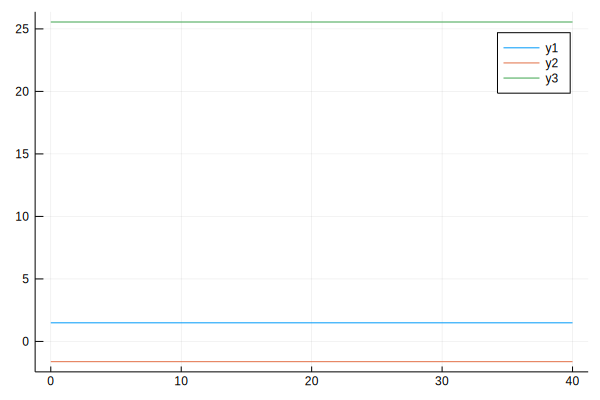

In [255]:
ŝ =  hcat(mean.(estimation_state)...)

plot(T,ŝ[1,1:end-1])
plot!(T,ŝ[2,1:end-1])
plot!(T,ŝ[3,1:end-1])


# s =  hcat(true_state...)
# plot!(sol, vars = (1))

In [ ]:
sol

In [71]:
sol.t

1287-element Array{Float64,1}:
   0.0                  
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624016752212923
   0.00905808176456279  
   0.0169564955927642   
   0.02769000245764448  
   0.04185634375662893  
   0.06024025665362463  
   0.0836852441654334   
   0.11336451506889586  
   0.14862131186030308  
   0.18703929175446188  
   ⋮                    
  99.17448947475748     
  99.25177886977121     
  99.3340481055892      
  99.40002509604705     
  99.47321520444633     
  99.54429913558833     
  99.6304176475736      
  99.73556893651245     
  99.81512588011671     
  99.88533419341042     
  99.94751447208056     
 100.0                  